#### This code reproduces the findings of the following scientific article, accepted for publication in npj Materials Degradation journal on 25 September 2023:
### Estimating pitting descriptors of 316L stainless steel by machine learning and statistical analysis
#### _Leonardo Bertolucci Coelho$^{1,2,*}$, Daniel Torres$^{1}$, Vincent Vangrunderbeek$^{2}$, Miguel Bernal$^{1}$, Gian Marco Paldino$^{3}$, Gianluca Bontempi$^{3}$, Jon Ustarroz$^{1,2}$_ 

_$^{1}$ChemSIN – Chemistry of Surfaces, Interfaces and Nanomaterials, Université libre de Bruxelles (ULB), Brussels, Belgium_ 

_$^{2}$Research Group Electrochemical and Surface Engineering (SURF), Vrije Universiteit Brussel, Brussels, Belgium_

_$^{3}$Machine Learning Group (MLG), Université libre de Bruxelles (ULB), Brussels, Belgium_

_*leonardo.bertolucci.coelho@ulb.be_

# 0.05 M NaCl, 50 mV/s

In [1]:
# Import the required libraries
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import sklearn
from scipy.stats import kde
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
from sklearn import metrics
from sklearn.metrics import r2_score

### datasets uploaded below can be downloaded at: https://data.mendeley.com/datasets/78rz8vw46x/2
Bertolucci Coelho, Leonardo (2023), “Micro-scale potentiodynamic polarisation curves of 316L stainless steel ”, Mendeley Data, V2, doi: 10.17632/78rz8vw46x.2

In [30]:
# choosing the directory for uploading the datasets
os.chdir(r"C:\Users\lbertolu\OneDrive - Vrije Universiteit Brussel\ULB\SECCM tests\pitting statistics paper draft\paper1")

# getting the current directory
%pwd

'C:\\Users\\lbertolu\\OneDrive - Vrije Universiteit Brussel\\ULB\\SECCM tests\\pitting statistics paper draft\\paper1'

In [31]:
df_E=pd.read_csv('E(V)_0.05_M_NaCl_50_mV_per_s.csv') 
E=df_E["E (V)"]
E

0       0.500198
1       0.500504
2       0.500809
3       0.501114
4       0.501724
          ...   
2212    1.352885
2213    1.353191
2214    1.353496
2215    1.353801
2216    1.354412
Name: E (V), Length: 2217, dtype: float64

In [32]:
df=pd.read_csv('j_uA-cm2_0.05_M_NaCl_50_mV_per_s.csv') 
df

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,126.286465,77.714748,1.068578e+02,116.572118,136.000808,136.000808,1.845725e+02,155.429498,77.714748,145.715152,...,116.572118,106.857775,301.144634,106.857775,174.858185,116.572118,97.143431,145.715152,106.857775,184.572516
1,126.286465,126.286465,1.457152e+02,106.857775,136.000808,106.857775,7.771475e+01,NaN,126.286465,77.714748,...,97.143431,155.429498,573.146266,126.286465,204.001206,145.715152,136.000808,145.715152,116.572118,213.715549
2,145.715152,155.429498,1.068578e+02,126.286465,184.572516,184.572516,1.360008e+02,145.715152,145.715152,116.572118,...,136.000808,184.572516,660.575361,155.429498,126.286465,136.000808,126.286465,97.143431,126.286465,155.429498
3,184.572516,155.429498,1.360008e+02,126.286465,58.286061,87.429094,1.457152e+02,126.286465,155.429498,126.286465,...,136.000808,87.429094,NaN,106.857775,136.000808,116.572118,145.715152,145.715152,136.000808,184.572516
4,116.572118,106.857775,1.457152e+02,145.715152,155.429498,136.000808,1.554295e+02,310.858993,97.143431,145.715152,...,174.858185,136.000808,223.429893,136.000808,174.858185,106.857775,126.286465,145.715152,155.429498,194.286859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,331072.198847,509439.514952,2.129422e+06,526928.518383,317610.444772,371690.291149,1.440826e+06,589730.141418,48066.572166,466468.736179,...,1224.007191,2282.870725,295296.606624,1262.864648,4225.739128,922.862611,1437.722804,1301.721945,582.860607,961.720004
2213,334184.032131,512877.459322,2.141799e+06,530900.348134,317561.873867,375855.681112,1.447526e+06,590225.403644,49708.296784,472066.950212,...,1175.435490,2273.156353,296132.033202,1262.864648,4245.168127,903.433899,1466.865857,1292.007669,582.860607,961.720004
2214,337266.716188,516281.408196,2.154177e+06,535124.756778,317532.726230,379938.504675,1.454134e+06,590676.944415,51670.591289,477747.716322,...,1185.149894,2321.728055,297657.199106,1272.579020,4206.310447,961.720004,1457.151485,1340.579402,582.860607,952.005600
2215,340174.539891,519476.499630,2.166720e+06,539145.159026,317561.873867,384016.464462,1.460722e+06,591045.917194,52447.738510,483336.218721,...,1204.578543,2253.727577,297064.627056,1253.150244,4216.024947,932.576952,1447.437208,1292.007669,602.289255,990.863057


#### filling missing values of j

In [33]:
# Multivariate imputer that estimates each feature from all the others.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_imputer = IterativeImputer()

# The Iterative Imputer models each feature with missing values as a function of other features, iteratively.
j_nan_filled=iter_imputer.fit_transform(df)
df=pd.DataFrame(j_nan_filled,columns=df.columns)

In [34]:
df_log=np.log10(df)

In [35]:
iter_imputer_log = IterativeImputer()

j_nan_filled_log=iter_imputer_log.fit_transform(df_log)
df_log=pd.DataFrame(j_nan_filled_log,columns=df_log.columns)
df_log

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,2.101357,1.890503,2.028806,2.066595,2.133541,2.133541,2.266167,2.191533,1.890503,2.163505,...,2.066595,2.028806,2.478775,2.028806,2.242686,2.066595,1.987413,2.163505,2.028806,2.266167
1,2.101357,2.101357,2.163505,2.028806,2.133541,2.028806,1.890503,3.396133,2.101357,1.890503,...,1.987413,2.191533,2.758265,2.101357,2.309633,2.163505,2.133541,2.163505,2.066595,2.329836
2,2.163505,2.191533,2.028806,2.101357,2.266167,2.266167,2.133541,2.163505,2.163505,2.066595,...,2.133541,2.266167,2.819922,2.191533,2.101357,2.133541,2.101357,1.987413,2.101357,2.191533
3,2.266167,2.191533,2.133541,2.101357,1.765565,1.941656,2.163505,2.101357,2.191533,2.101357,...,2.133541,1.941656,2.960094,2.028806,2.133541,2.066595,2.163505,2.163505,2.133541,2.266167
4,2.066595,2.028806,2.163505,2.163505,2.191533,2.133541,2.191533,2.492563,1.987413,2.163505,...,2.242686,2.133541,2.349141,2.133541,2.242686,2.028806,2.101357,2.163505,2.191533,2.288443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,5.519923,5.707093,6.328262,5.721752,5.501895,5.570181,6.158612,5.770653,4.681843,5.668823,...,3.087784,3.358481,5.470258,3.101357,3.625903,2.965137,3.157675,3.114518,2.765565,2.983049
2213,5.523986,5.710014,6.330779,5.725013,5.501828,5.575021,6.160626,5.771018,4.696429,5.674004,...,3.070199,3.356629,5.471485,3.101357,3.627895,2.955896,3.166390,3.111265,2.765565,2.983049
2214,5.527973,5.712886,6.333281,5.728455,5.501788,5.579713,6.162604,5.771350,4.713243,5.679199,...,3.073773,3.365811,5.473716,3.104685,3.623901,2.983049,3.163505,3.127293,2.765565,2.978640
2215,5.531702,5.715566,6.335803,5.731706,5.501828,5.584350,6.164567,5.771621,4.719727,5.684249,...,3.080835,3.352901,5.472851,3.098003,3.624903,2.969685,3.160600,3.111265,2.779805,2.996014


### exporting the log(j) curves (missing values filled) as a CSV file

In [40]:
os.chdir(r"C:\Users\lbertolu\OneDrive - Vrije Universiteit Brussel\ULB\SECCM tests\pitting statistics paper draft\pape2")

df_log.to_csv('logj_uA-cm2_0.05_M_NaCl_50_mV_per_s.csv', index=False)

#### dataset exported above is permanently stored at: https://data.mendeley.com/datasets/7j6b6y48jw/1
Bertolucci Coelho, Leonardo; Ustarroz, Jon (2023), “Micro-scale potentiodynamic polarisation (log(j)) curves of 316L stainless steel”, Mendeley Data, V1, doi: 10.17632/7j6b6y48jw.1

In [37]:
df_log.columns= df_log.columns.astype(int) # converting to int the str cols (Maps) 

### plotting the raw and smoothed log(j) Vs E curves

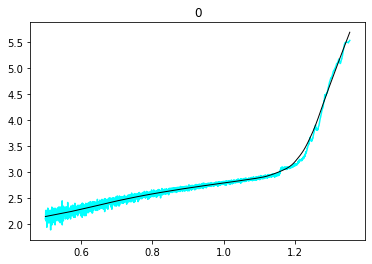

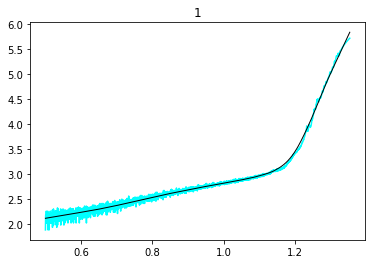

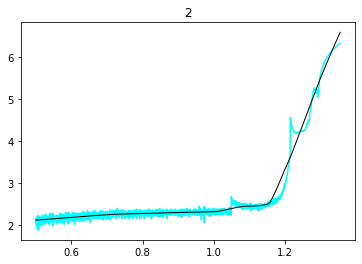

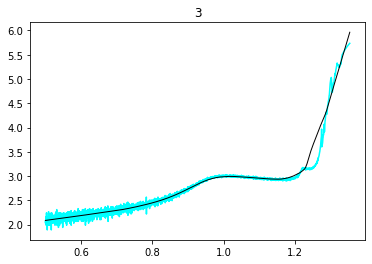

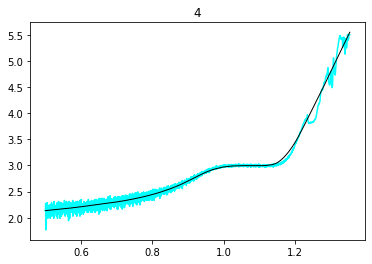

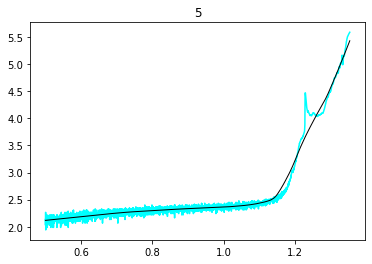

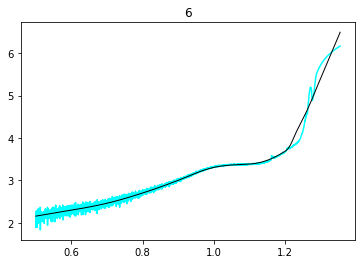

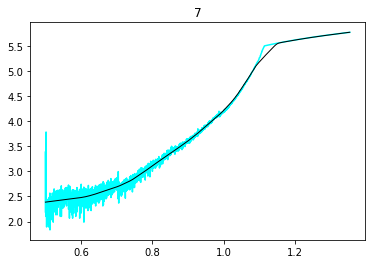

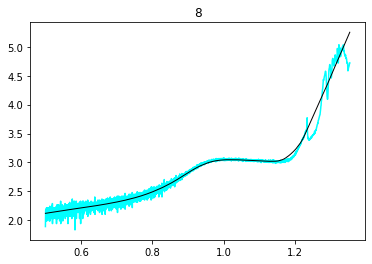

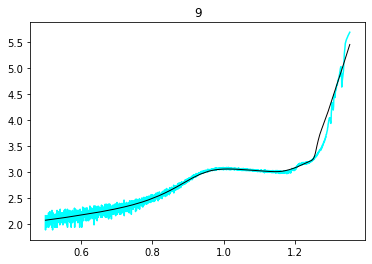

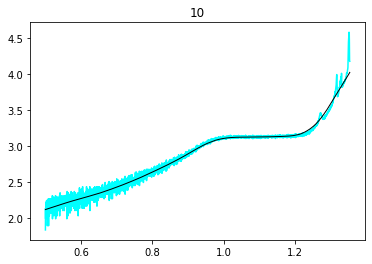

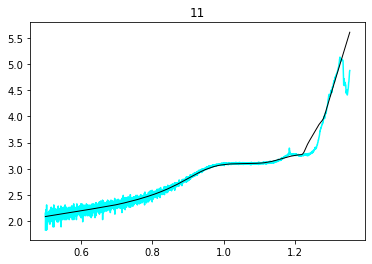

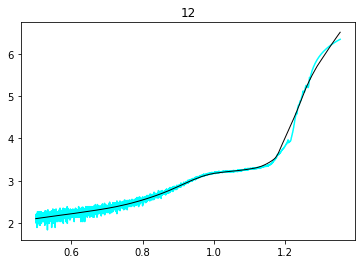

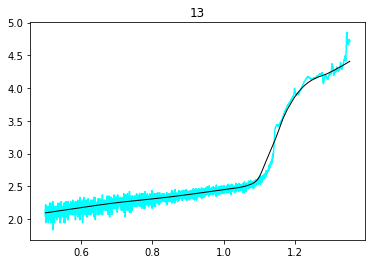

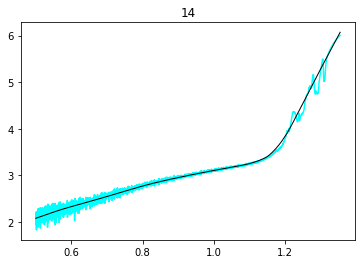

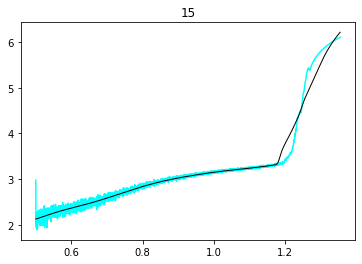

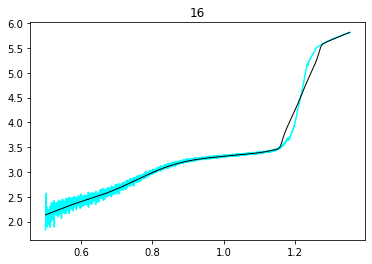

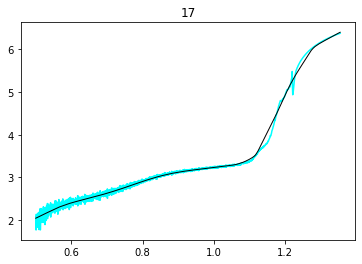

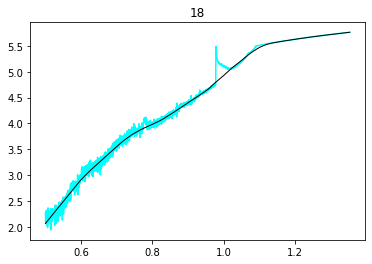

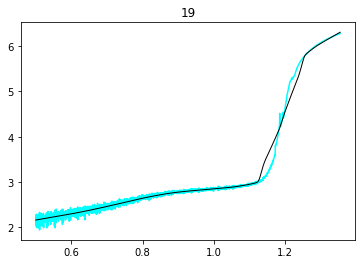

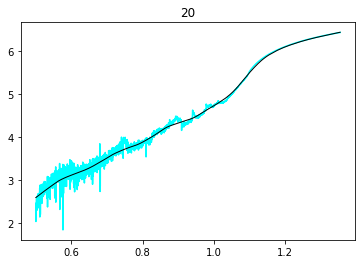

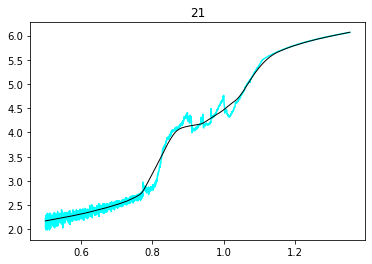

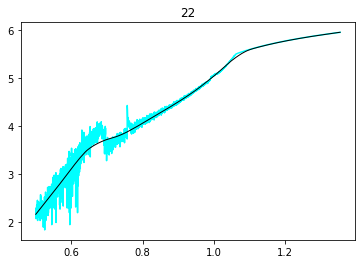

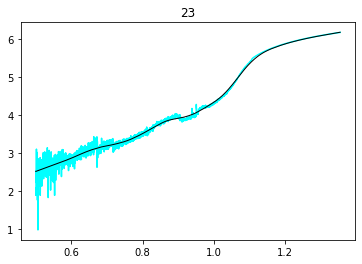

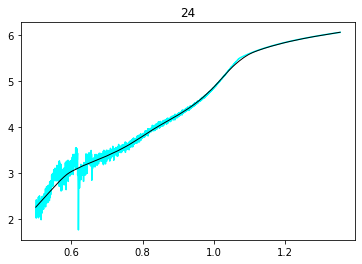

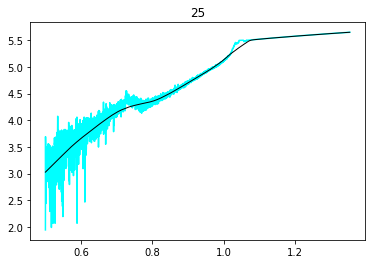

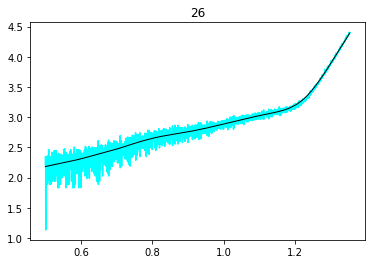

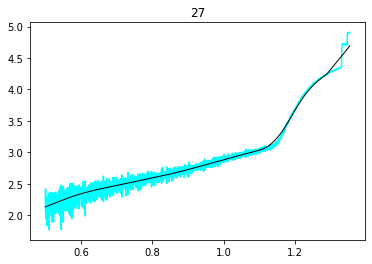

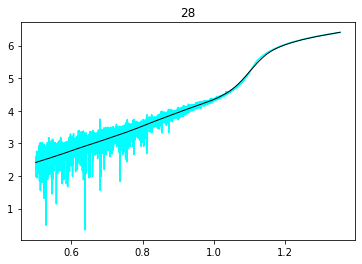

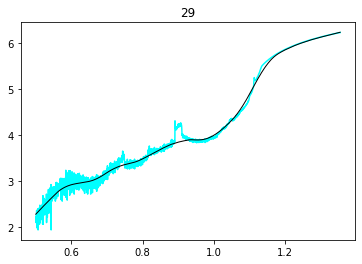

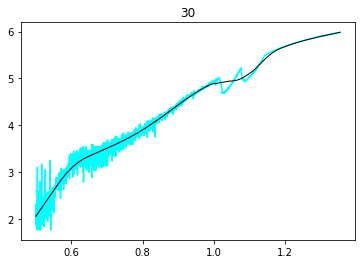

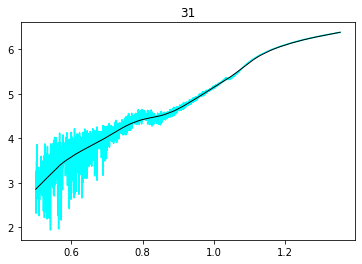

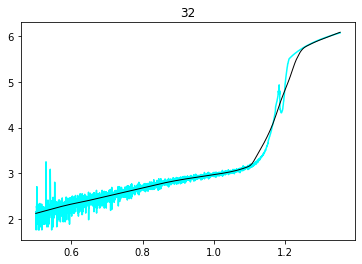

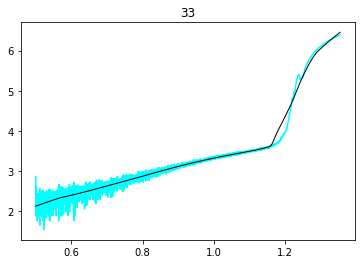

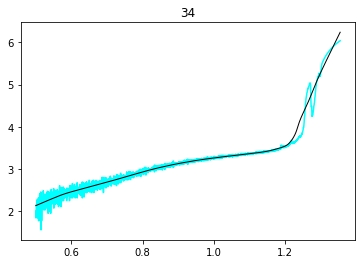

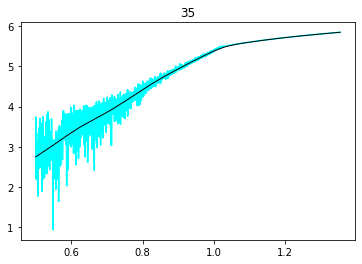

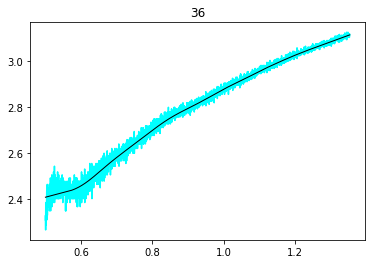

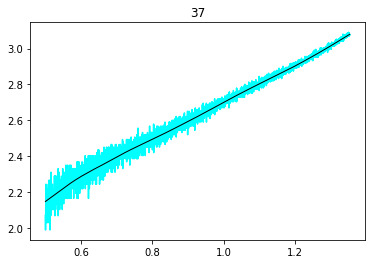

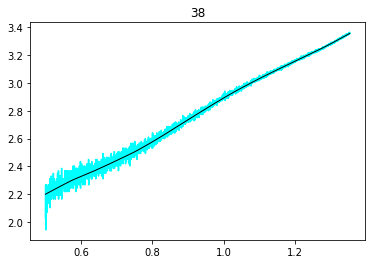

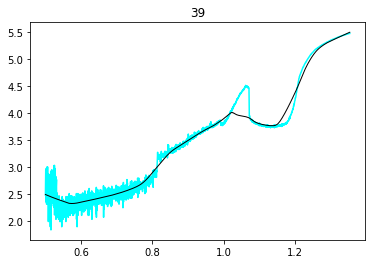

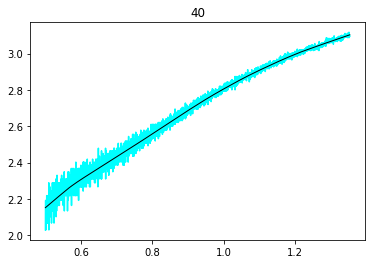

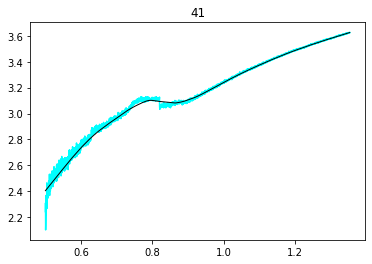

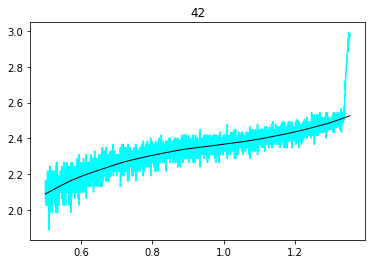

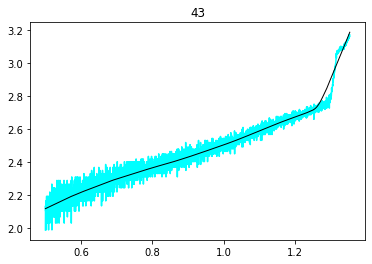

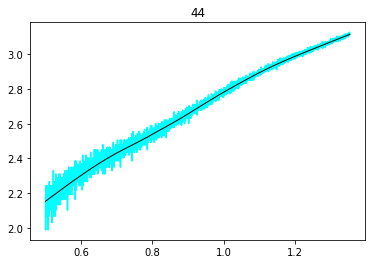

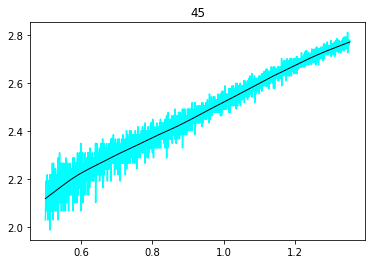

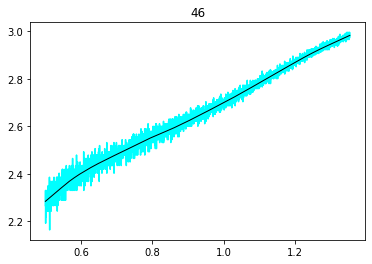

In [30]:
plt.rcParams.update({'figure.max_open_warning': 0})

column_names =  df_log.columns
for index, column in enumerate(column_names):
    fig, ax = plt.subplots() 
        
    lowess = sm.nonparametric.lowess
    ylow = lowess(df_log[column],E,frac= 0.15,return_sorted=False)

    ax.plot(E , df_log[column], color = "cyan")
    ax.plot(E , ylow, linewidth = 1, color = "black")
    ax.set_title(column)

### storing the smoothed log(j) in a df

In [9]:
df_ylow_log = df_log.copy()

column_names =  df_log.columns
for index, column in enumerate(column_names):
        
    lowess = sm.nonparametric.lowess
    ylow = lowess(df_log[column],E,frac= 0.15,return_sorted=False)
    df_ylow_log[column]=ylow
    
df_ylow_log

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,2.148055,2.122565,2.122035,2.085915,2.134767,2.117954,2.157508,2.386245,2.119223,2.076862,...,2.146099,2.198757,2.488496,2.151349,2.404328,2.091155,2.116646,2.152567,2.118387,2.283948
1,2.148455,2.122923,2.122228,2.086216,2.134972,2.118163,2.157952,2.386545,2.119521,2.077135,...,2.146545,2.199181,2.487625,2.151864,2.405378,2.091480,2.116963,2.153031,2.118734,2.284340
2,2.148855,2.123280,2.122422,2.086516,2.135177,2.118373,2.158395,2.386845,2.119819,2.077408,...,2.146990,2.199605,2.486755,2.152379,2.406427,2.091806,2.117280,2.153495,2.119080,2.284732
3,2.149255,2.123638,2.122615,2.086817,2.135381,2.118582,2.158839,2.387144,2.120117,2.077681,...,2.147436,2.200028,2.485886,2.152894,2.407476,2.092131,2.117597,2.153959,2.119427,2.285124
4,2.150056,2.124354,2.123002,2.087419,2.135791,2.119001,2.159726,2.387743,2.120713,2.078228,...,2.148327,2.200875,2.484152,2.153922,2.409574,2.092782,2.118230,2.154887,2.120120,2.285908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,5.665332,5.814500,6.567706,5.925637,5.525437,5.405776,6.462723,5.772222,5.229566,5.420554,...,3.078108,3.355405,5.489859,3.102494,3.624481,2.525190,3.180712,3.114062,2.771958,2.981739
2213,5.670766,5.819077,6.573500,5.933122,5.529712,5.410880,6.468721,5.772503,5.233893,5.427189,...,3.078479,3.355834,5.490751,3.102697,3.624741,2.525417,3.182364,3.114312,2.772131,2.981948
2214,5.676196,5.823651,6.579289,5.940604,5.533986,5.415983,6.474717,5.772783,5.238219,5.433823,...,3.078851,3.356264,5.491642,3.102900,3.625000,2.525644,3.184017,3.114562,2.772304,2.982158
2215,5.681629,5.828227,6.585079,5.948091,5.538262,5.421092,6.480716,5.773064,5.242546,5.440464,...,3.079223,3.356694,5.492534,3.103104,3.625259,2.525871,3.185670,3.114812,2.772478,2.982367


# Epit estimation by rule-based linear regression

## definition of classes of log(j) Vs E curves based on their qualitative degree of similarity 

### providing initial guesses for the Epit intervals and the Epass values (for improved accuracy of estimation)

#### optimized combination for the general class
Epit interval=[1.1,1.15]

Epass=0.9 

In [10]:
Epit_interval_lower = float(input(r"Enter a guess value (V) for the lower limit of the Epit interval: ")) 
Epit_interval_upper = float(input(r"Enter a guess value (V) for the upper limit of the Epit interval: ")) 
Epass_estimated = float(input(r"Enter a guess value (V) for Epass: ")) 
interval_lower_i=E[E>Epit_interval_lower].dropna().index[0]
interval_upper_i=E[E<Epit_interval_upper].dropna().index[-1]
Epass_estimated_i=E[E<Epass_estimated].dropna().index[-1]
print("Epit guessed interval: "+str(round(E[interval_upper_i]-E[interval_lower_i],3))+" V")
print("Epass estimated: "+str(round(E[Epass_estimated_i],3))+" V")

Enter a guess value (V) for the lower limit of the Epit interval: 1.1
Enter a guess value (V) for the upper limit of the Epit interval: 1.15
Enter a guess value (V) for Epass: 0.9
Epit guessed interval: 0.05 V
Epass estimated: 0.9 V


In [11]:
class1=[13,17,20,21,23,28,29,32,41] # early pitting 

#### optimized combination for class1
Epit interval=[0.85,0.95]

Epass=0.8

In [12]:
Epit_interval_lower1 = float(input(r"Enter a guess value (V) for the lower limit of the Epit interval: ")) 
Epit_interval_upper1 = float(input(r"Enter a guess value (V) for the upper limit of the Epit interval: ")) 
Epass_estimated1 = float(input(r"Enter a guess value (V) for Epass: ")) 
interval_lower_i1=E[E>Epit_interval_lower1].dropna().index[0]
interval_upper_i1=E[E<Epit_interval_upper1].dropna().index[-1]
Epass_estimated_i1=E[E<Epass_estimated1].dropna().index[-1]
print("Epit guessed interval: "+str(round(E[interval_upper_i1]-E[interval_lower_i1],3))+" V")
print("Epass estimated: "+str(round(E[Epass_estimated_i1],3))+" V")

Enter a guess value (V) for the lower limit of the Epit interval: 0.85
Enter a guess value (V) for the upper limit of the Epit interval: 0.95
Enter a guess value (V) for Epass: 0.8
Epit guessed interval: 0.099 V
Epass estimated: 0.8 V


class12 class22 class32: not distinguished by the underlying electrochemical behaviour, but the different curves' shapes require different input intervals for improved computation

In [13]:
class12=[20,23,28,29]

#### optimized combination for class12
Epit interval=[0.9,1.01]

In [14]:
Epit_interval_lower12 = float(input(r"Enter a guess value (V) for the lower limit of the Epit interval: ")) 
Epit_interval_upper12 = float(input(r"Enter a guess value (V) for the upper limit of the Epit interval: ")) 
interval_lower_i12=E[E>Epit_interval_lower12].dropna().index[0]
interval_upper_i12=E[E<Epit_interval_upper12].dropna().index[-1]
print("Epit guessed interval: "+str(round(E[interval_upper_i12]-E[interval_lower_i12],3))+" V")

Enter a guess value (V) for the lower limit of the Epit interval: 0.9
Enter a guess value (V) for the upper limit of the Epit interval: 1.01
Epit guessed interval: 0.109 V


In [15]:
class22=[13,17,32] 

#### optimized combination for class22
Epit interval=[0.9,1.07]

In [16]:
Epit_interval_lower22 = float(input(r"Enter a guess value (V) for the lower limit of the Epit interval: ")) 
Epit_interval_upper22 = float(input(r"Enter a guess value (V) for the upper limit of the Epit interval: ")) 
interval_lower_i22=E[E>Epit_interval_lower22].dropna().index[0]
interval_upper_i22=E[E<Epit_interval_upper22].dropna().index[-1]
print("Epit guessed interval: "+str(round(E[interval_upper_i22]-E[interval_lower_i22],3))+" V")

Enter a guess value (V) for the lower limit of the Epit interval: 0.9
Enter a guess value (V) for the upper limit of the Epit interval: 1.07
Epit guessed interval: 0.17 V


In [23]:
class32=[42,43] # late pitting / pseudo passivity

#### optimized combination for class32
Epit interval=[1.29,1.3]

In [17]:
Epit_interval_lower32 = float(input(r"Enter a guess value (V) for the lower limit of the Epit interval: ")) 
Epit_interval_upper32 = float(input(r"Enter a guess value (V) for the upper limit of the Epit interval: ")) 
interval_lower_i32=E[E>Epit_interval_lower32].dropna().index[0]
interval_upper_i32=E[E<Epit_interval_upper32].dropna().index[-1]
print("Epit guessed interval: "+str(round(E[interval_upper_i32]-E[interval_lower_i32],3))+" V")

Enter a guess value (V) for the lower limit of the Epit interval: 1.29
Enter a guess value (V) for the upper limit of the Epit interval: 1.3
Epit guessed interval: 0.009 V


In [18]:
no_passive_class=[7,18,22,24,25,30,31,35,36,37,38,40,44,45,46] # Epit=0.5 by default

In [19]:
class2=[0,1,2,5,13,14,26,27,32,33] # early passivity

In [20]:
class3=[20,21,23,28,29,39,42,43] # pseudo passivity

In [21]:
class3_Epass = [21,39,42] # pseudo passivity with Epass not nan 

## plotting the Epit (E and log(j) pair values) estimated by linear regression

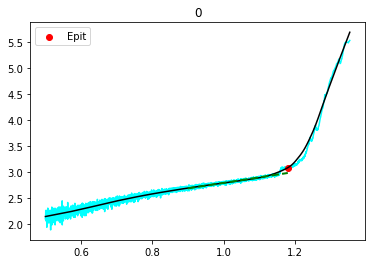

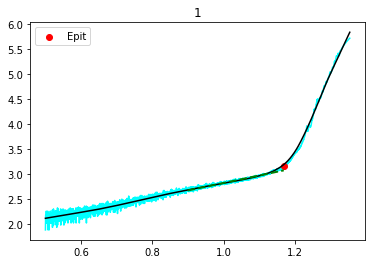

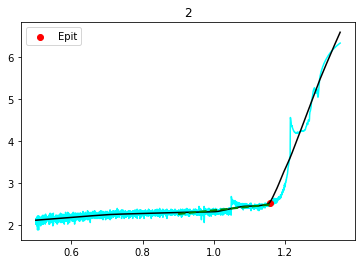

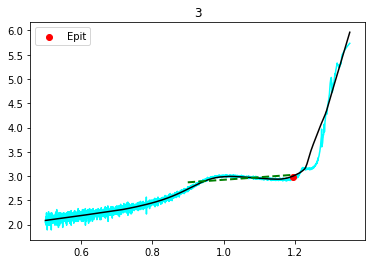

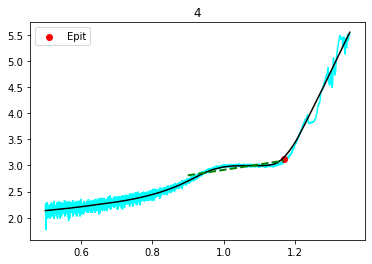

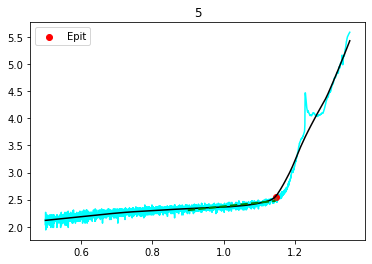

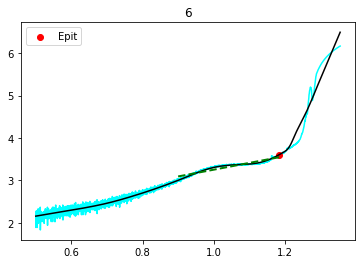

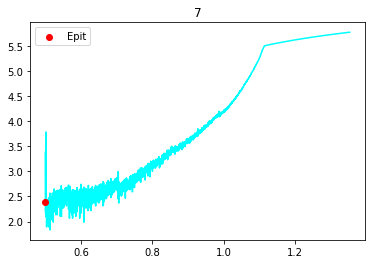

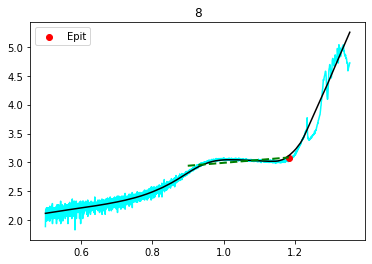

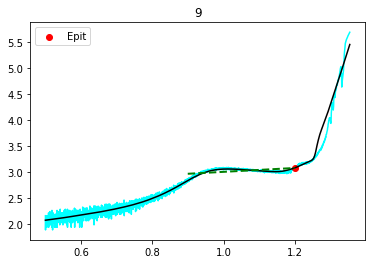

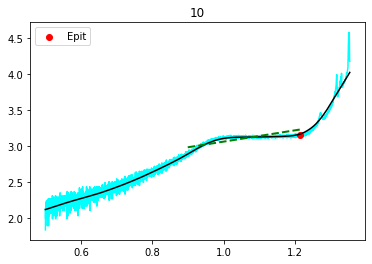

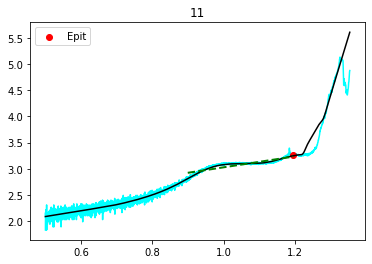

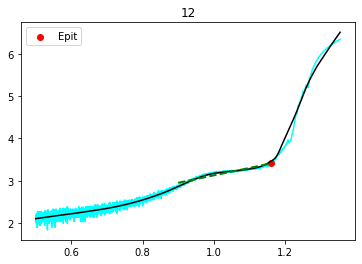

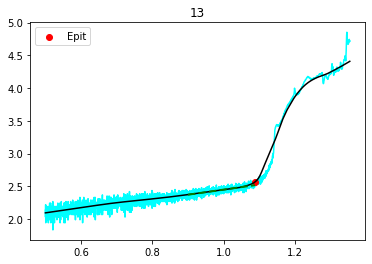

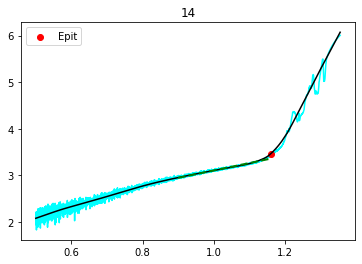

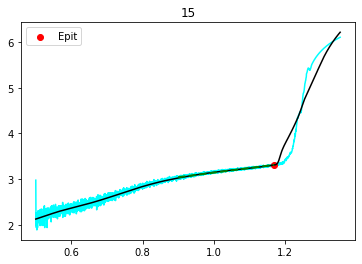

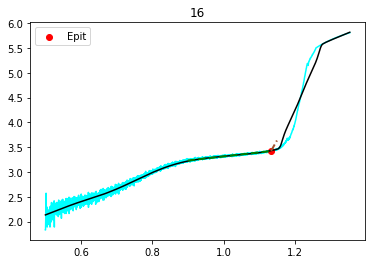

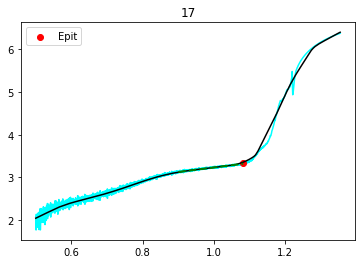

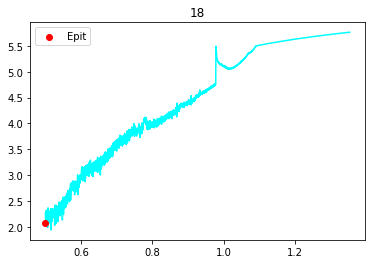

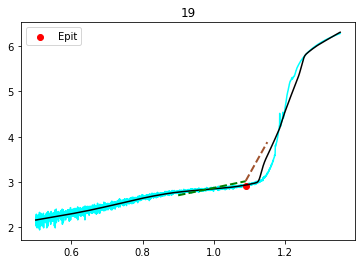

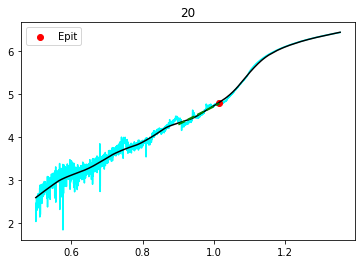

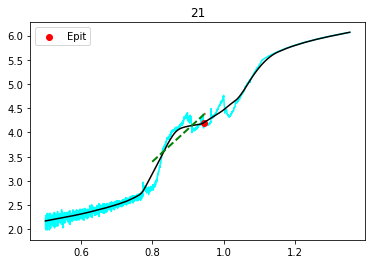

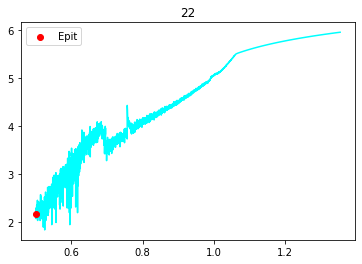

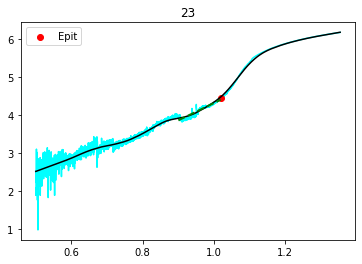

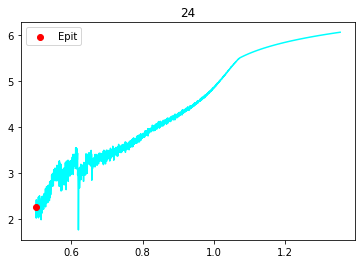

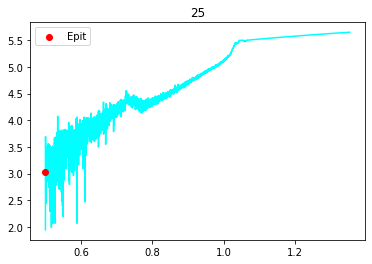

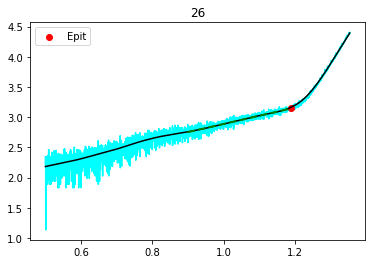

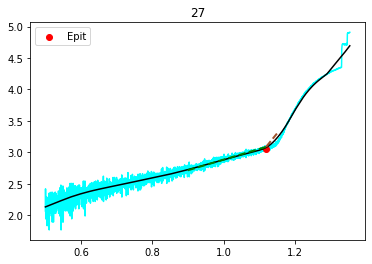

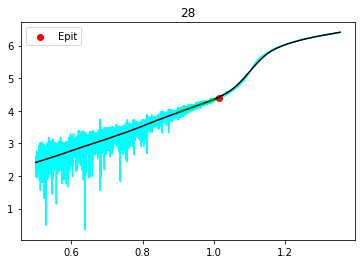

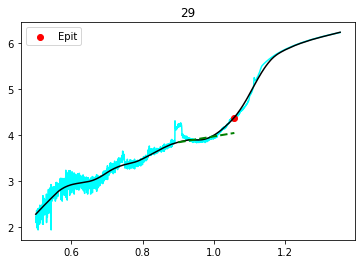

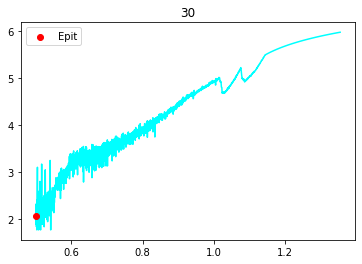

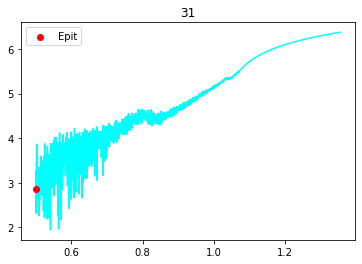

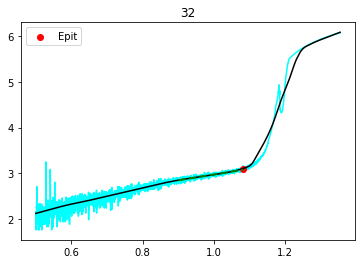

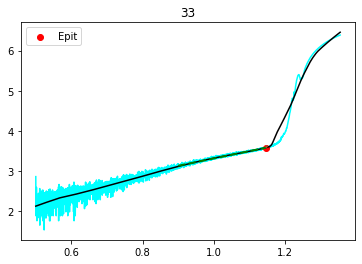

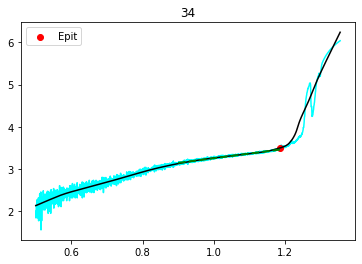

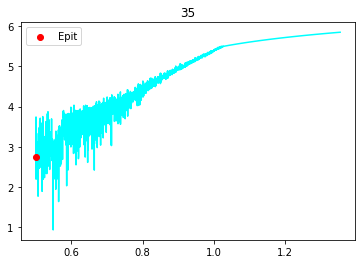

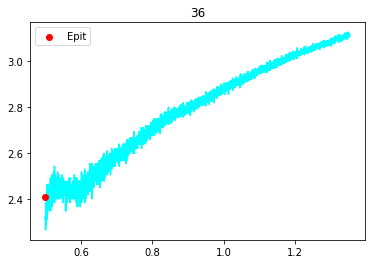

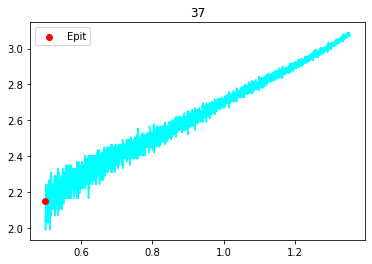

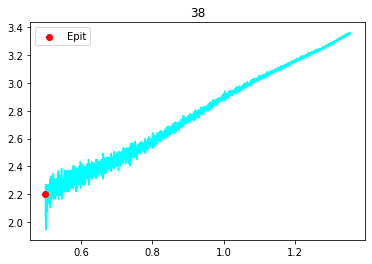

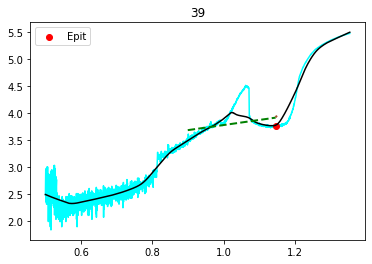

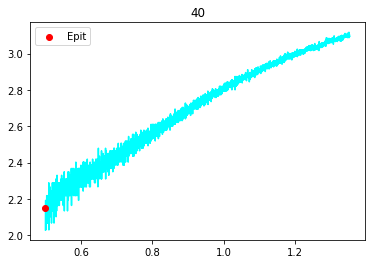

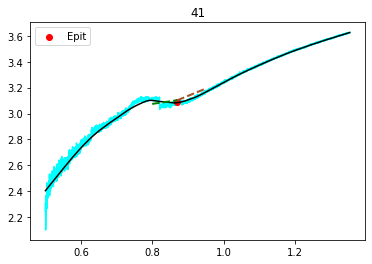

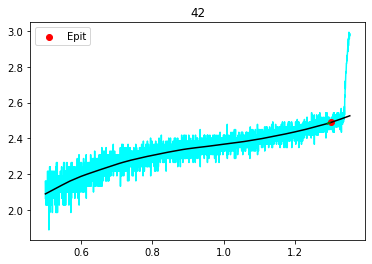

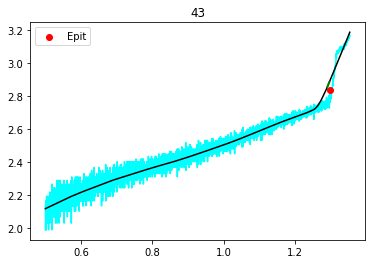

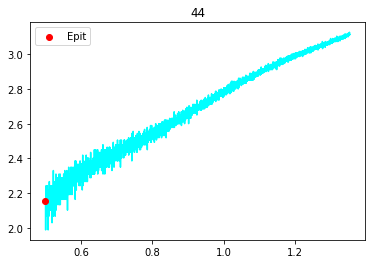

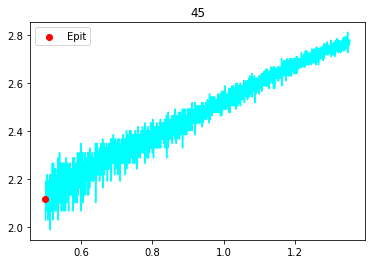

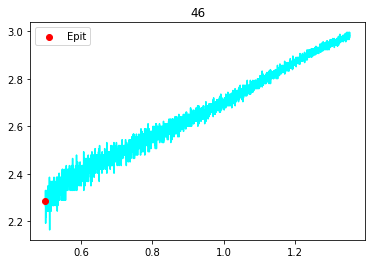

In [24]:
# for avoiding Warnings
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings('ignore')

column_names = df_ylow_log.columns

# collect all of the slopes and intercepts for the two parts
Epit_E, Epit_j = [], []

# initialize the two models for part 1 and part 2
model1 = LinearRegression()
model2 = LinearRegression()

for index, column in enumerate(column_names):
    fig, ax = plt.subplots()

    ax.plot(E, df_log[column], color="cyan", zorder=1)
    ax.set_title(column)

    # Initialize the r2 values
    r2_final1, r2_final2 = 0, 0

    if column not in no_passive_class:
        ax.plot(E, df_ylow_log[column], color="black", zorder=2)

        # Determine limits based on class
        if column in class22: # from the more specific to the more generalised class (exp: class12 and then class1)
            limits_pit = range(interval_lower_i22, interval_upper_i22+1, 1)
            Epass_estimated = interval_lower_i22
        elif column in class12:
            limits_pit = range(interval_lower_i12, interval_upper_i12+1, 1)
            Epass_estimated = interval_lower_i12
        elif column in class1:
            limits_pit = range(interval_lower_i1, interval_upper_i1+1, 1)
            Epass_estimated = Epass_estimated_i1
        elif column in class32:
            limits_pit = range(interval_lower_i32, interval_upper_i32+1, 1)
            Epass_estimated = interval_lower_i32
        else:  # class2 or class3
            limits_pit = range(interval_lower_i, interval_upper_i+1, 1)
            Epass_estimated = Epass_estimated_i

        for limit in limits_pit:
            # split the data for modeling
            dfE_1 = E.iloc[Epass_estimated:limit+1]
            dfj_1 = df_ylow_log.iloc[Epass_estimated:limit+1]
            if column in class12 + class22 + class32:
                dfE_2 = E.iloc[limit:limits_pit[-1]+1]
                dfj_2 = df_ylow_log.iloc[limit:limits_pit[-1]+1]
            else:
                dfE_2 = E.iloc[limit:]
                dfj_2 = df_ylow_log.iloc[limit:]

            X1,X2 = dfE_1.values.reshape(-1, 1),dfE_2.values.reshape(-1, 1)
            y1,y2 = dfj_1[column].values.reshape(-1, 1),dfj_2[column].values.reshape(-1, 1)

            # Fit models
            regr1, regr2 = model1.fit(X1, y1), model2.fit(X2, y2)
    
            # Evaluate models
            r2_score1, r2_score2 = r2_score(y1, regr1.predict(X1)), r2_score(y2, regr2.predict(X2))

            # Store best models
            if r2_score1 > r2_final1:
                r2_final1, regr_final1 = r2_score1, regr1
            if r2_score2 > r2_final2:
                r2_final2, regr_final2 = r2_score2, regr2

        # Determine intersection
        a1, a2 = regr_final1.coef_[0], regr_final2.coef_[0]
        b1, b2 = regr_final1.intercept_, regr_final2.intercept_

        x_intersect = np.around((b1-b2)/(a2-a1), 3)
        E_tempo = E.round(3)
        try:
            xi = E_tempo[E_tempo <= x_intersect.item()].index[-1]
        except:
            xi = E_tempo[E_tempo >= x_intersect.item()].index[0]

        try:
            # plot the best-fit lines up to the intersection
            x1_reg,x2_reg  = E.iloc[Epass_estimated:xi+1],E.iloc[xi:limits_pit[-1]+1]
            y1_reg,y2_reg  = x1_reg * a1 + b1,x2_reg * a2 + b2
            
            ax.plot(x1_reg, y1_reg, linewidth=2, color='green', linestyle='dashed')
            ax.plot(x2_reg, y2_reg, linewidth=2, color='sienna', linestyle='dashed')
            ax.scatter(E.iloc[xi], np.mean([df_log[column].iloc[xi], df_ylow_log[column].iloc[xi]]), color="red", label="Epit")
            ax.legend()

            Epit_E.append(E.iloc[xi])
            Epit_j.append(np.mean([df_log[column].iloc[xi], df_ylow_log[column].iloc[xi]]))  # Epass_j --> the mean of ylow and df_log
        except:
            print(column)

    else:  # no_passive_class
        ax.scatter(E.iloc[0], df_ylow_log[column].iloc[0], color="red", label="Epit")
        ax.legend()
        Epit_E.append(E.iloc[0])
        Epit_j.append(df_ylow_log[column].iloc[0])


### storing the Epit (x,y) values in a df

In [25]:
pit_log = pd.DataFrame({"Epit_x":Epit_E,"Epit_y":Epit_j})
pit_log.index=df_log.columns
pit_log.index.name="Maps"
pit_log

,Epit_x,Epit_y
Maps,,
0,1.180456,3.081906
1,1.169164,3.164659
2,1.158483,2.522372
3,1.195410,2.982463
4,1.169164,3.120280
5,1.146275,2.545737
6,1.183203,3.601010
7,0.500198,2.386245
8,1.183203,3.075022


# Epass estimation by rule-based linear regression

### providing initial guesses for the Epass intervals (for improved accuracy of estimation)

#### optimized combination for the general class
Epass interval=[0.9,1]

In [26]:
Epass_interval_lower = float(input(r"Enter a guess value (V) for the lower limit of the Epass interval: ")) 
Epass_interval_upper = float(input(r"Enter a guess value (V) for the upper limit of the Epass interval: ")) 
interval_lower_ipass=E[E>Epass_interval_lower].dropna().index[0]
interval_upper_ipass=E[E<Epass_interval_upper].dropna().index[-1]
print("Epass guessed interval: "+str(round(E[interval_upper_ipass]-E[interval_lower_ipass],3))+" V")

Enter a guess value (V) for the lower limit of the Epass interval: 0.9
Enter a guess value (V) for the upper limit of the Epass interval: 1
Epass guessed interval: 0.099 V


#### optimized combination for class1
Epass interval=[0.65,85]

0.65
0.85

In [27]:
Epass_interval_lower1 = float(input(r"Enter a guess value (V) for the lower limit of the Epass interval: ")) 
Epass_interval_upper1 = float(input(r"Enter a guess value (V) for the upper limit of the Epass interval: ")) 
interval_lower_ipass1=E[E>Epass_interval_lower1].dropna().index[0]
interval_upper_ipass1=E[E<Epass_interval_upper1].dropna().index[-1]
print("Epass guessed interval: "+str(round(E[interval_upper_ipass1]-E[interval_lower_ipass1],3))+" V")

Enter a guess value (V) for the lower limit of the Epass interval: 0.65
Enter a guess value (V) for the upper limit of the Epass interval: 0.85
Epass guessed interval: 0.2 V


## plotting the Epass (E and log(j) pair values) estimated by linear regression

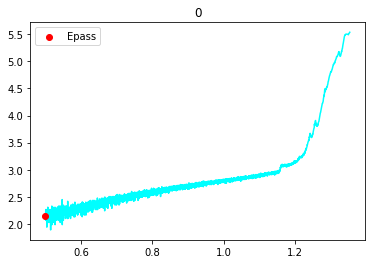

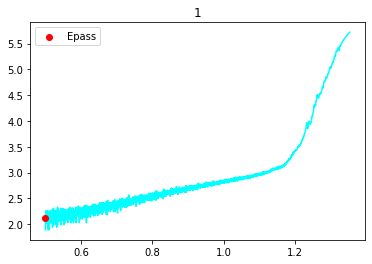

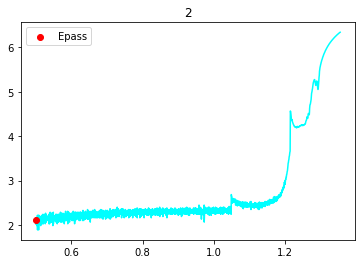

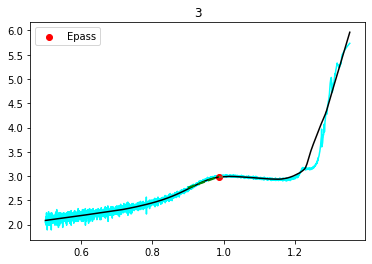

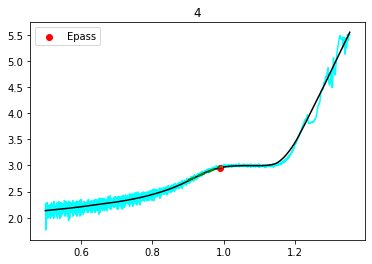

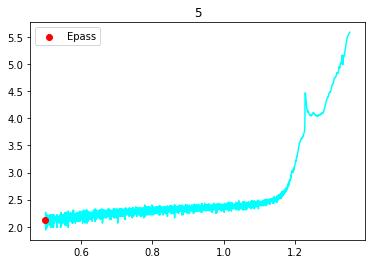

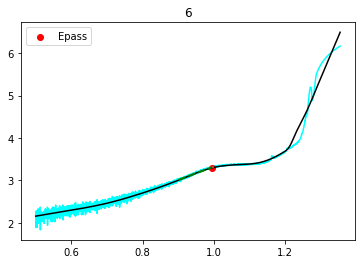

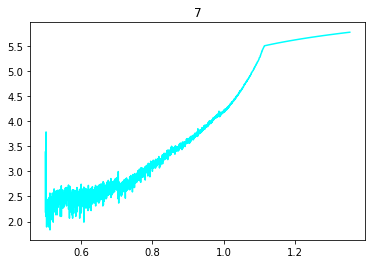

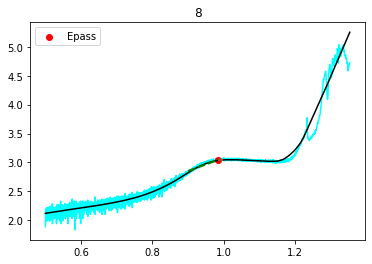

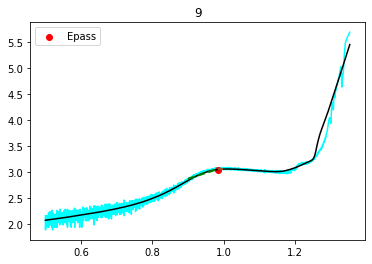

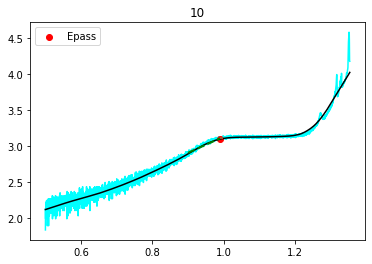

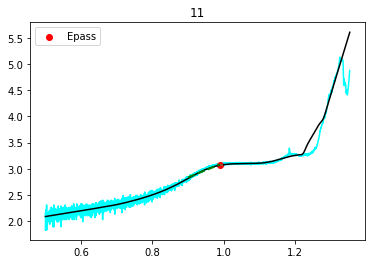

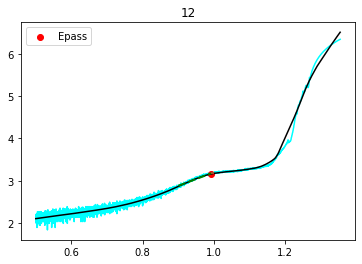

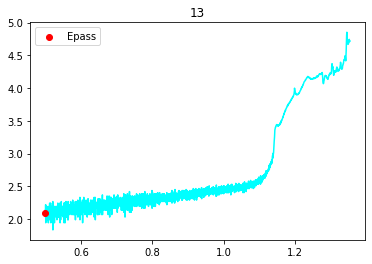

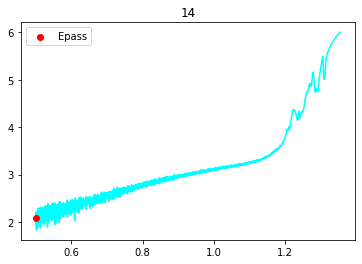

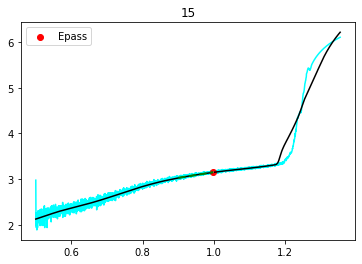

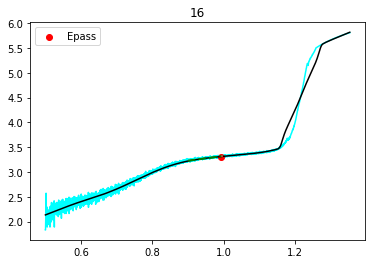

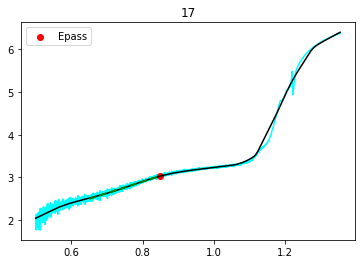

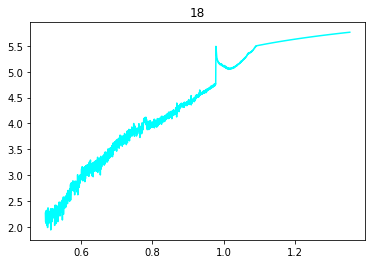

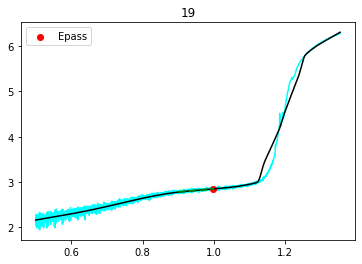

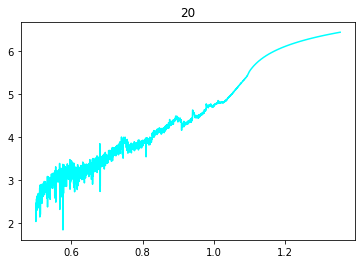

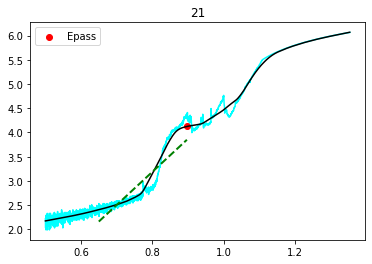

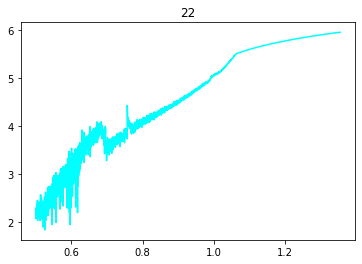

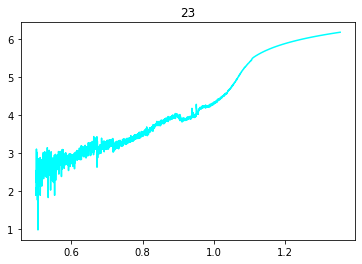

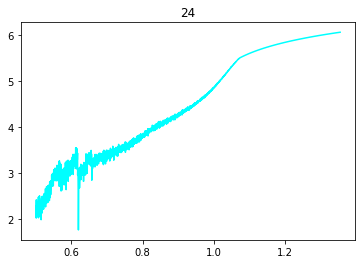

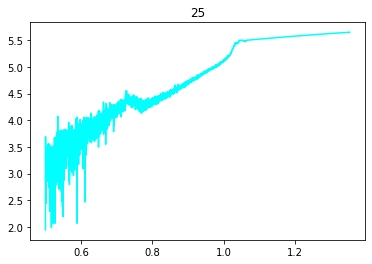

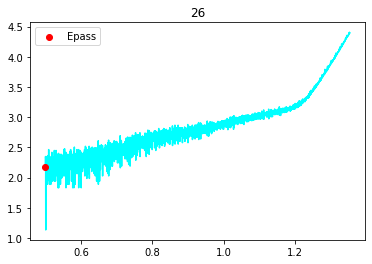

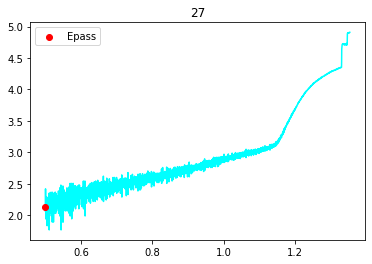

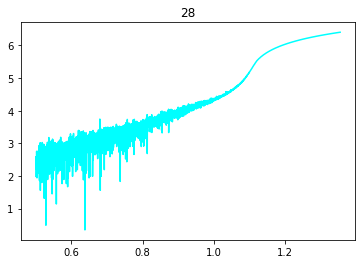

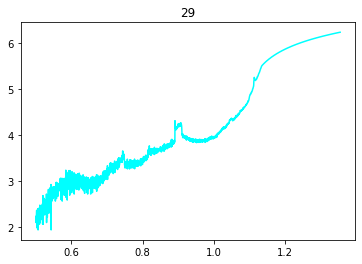

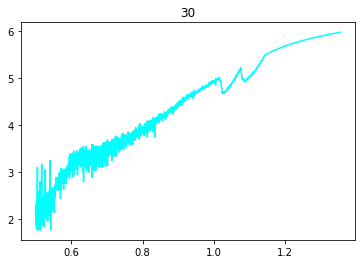

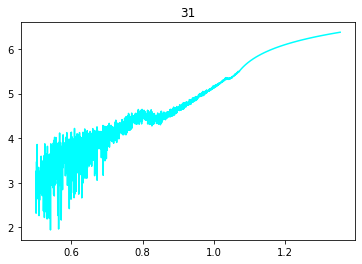

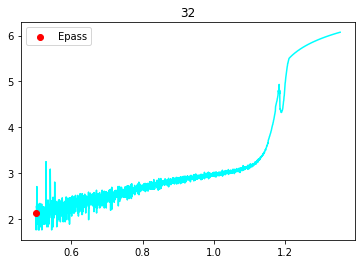

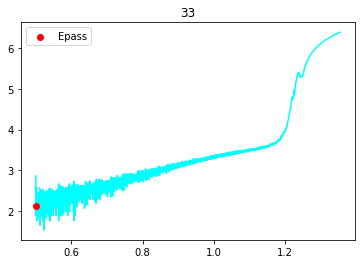

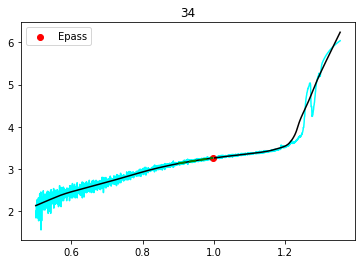

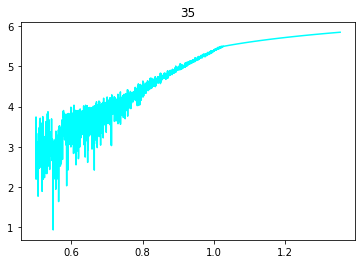

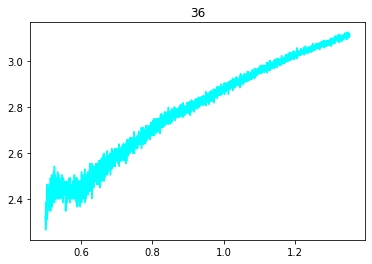

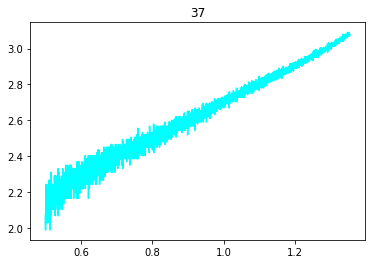

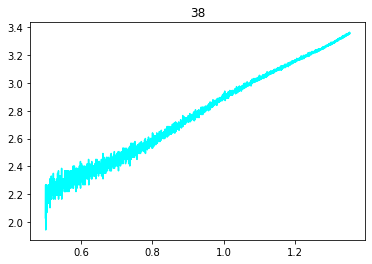

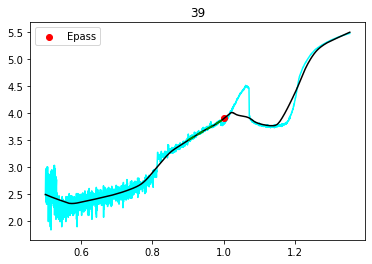

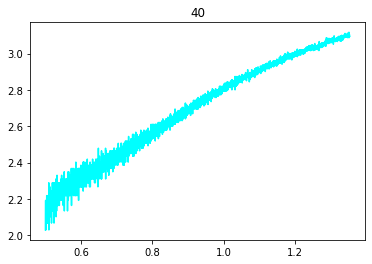

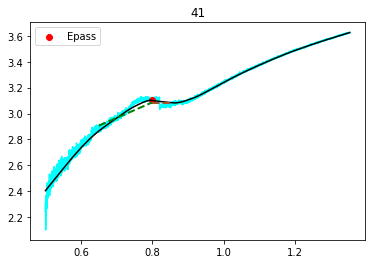

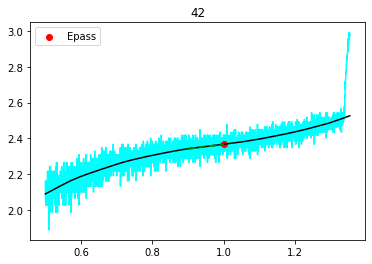

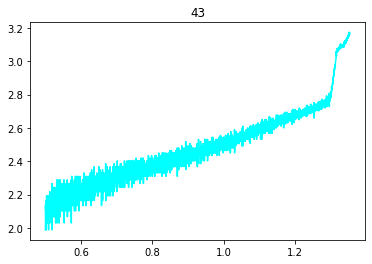

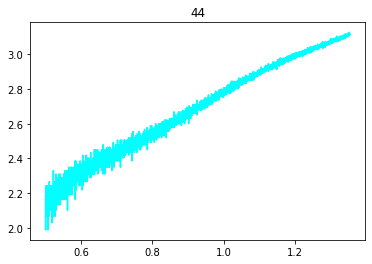

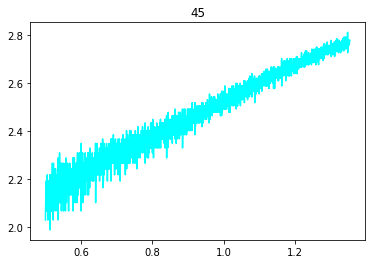

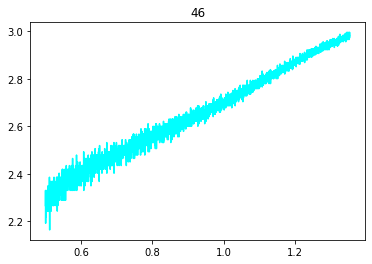

In [28]:
# for avoiding Warnings
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings('ignore')

column_names = df_ylow_log.columns

# Collect all of the slopes and intercepts for the two parts
Epass_E, Epass_j = [], []

# Initialize the two models for part 1 and part 2
model1 = LinearRegression()
model2 = LinearRegression()

for index, column in enumerate(column_names):
    fig, ax = plt.subplots()

    ax.plot(E, df_log[column], color="cyan", zorder=1)
    ax.set_title(column)

    # Initialize the r2 values
    r2_final1, r2_final2 = 0, 0

    if column not in no_passive_class + class2 + list(set(class3)-set(class3_Epass)): #--> no Epass 
        ax.plot(E, df_ylow_log[column], color="black", zorder=2)

        # Determine limits based on class
        if column in class1:
            limits_pass = range(interval_lower_ipass1, interval_upper_ipass1+1, 1)
        else:
            limits_pass = range(interval_lower_ipass, interval_upper_ipass+1, 1)

        for limit in limits_pass:
            # Split the data for modeling
            dfE_1 = E.iloc[limits_pass[0]:limit+1]
            dfE_2 = E.iloc[limit:limits_pass[-1]+1]
            dfj_1 = df_ylow_log.iloc[limits_pass[0]:limit+1]
            dfj_2 = df_ylow_log.iloc[limit:limits_pass[-1]+1]
            X1,X2 = dfE_1.values.reshape(-1, 1),dfE_2.values.reshape(-1, 1)
            y1,y2 = dfj_1[column].values.reshape(-1, 1),dfj_2[column].values.reshape(-1, 1)

            # Fit models
            regr1, regr2 = model1.fit(X1, y1), model2.fit(X2, y2)
    
            # Evaluate models
            r2_score1, r2_score2 = r2_score(y1, regr1.predict(X1)), r2_score(y2, regr2.predict(X2))

            # Store best models
            if r2_score1 > r2_final1:
                r2_final1, regr_final1 = r2_score1, regr1
            if r2_score2 > r2_final2:
                r2_final2, regr_final2 = r2_score2, regr2

        # Determine intersection
        a1, a2 = regr_final1.coef_[0], regr_final2.coef_[0]
        b1, b2 = regr_final1.intercept_, regr_final2.intercept_

        x_intersect = np.around((b1-b2)/(a2-a1), 3)
        E_tempo = E.round(3)
        try:
            xi = E_tempo[E_tempo <= x_intersect.item()].index[-1]
        except:
            xi = E_tempo[E_tempo >= x_intersect.item()].index[0]

        try:
            # plot the best-fit lines up to the intersection
            x1_reg,x2_reg  = E.iloc[limits_pass[0]:xi+1],E.iloc[xi:limits_pass[-1]+1]
            y1_reg,y2_reg  = x1_reg * a1 + b1,x2_reg * a2 + b2   

            ax.plot(x1_reg, y1_reg, linewidth=2, color='green', linestyle='dashed')
            ax.plot(x2_reg, y2_reg, linewidth=2, color='sienna', linestyle='dashed')
            ax.scatter(E.iloc[xi], df_ylow_log[column].iloc[xi], color="red", label="Epass")
            ax.legend()
            Epass_E.append(E.iloc[xi])
            Epass_j.append(df_ylow_log[column].iloc[xi])
        except:
            print(column)

    elif column in class2:
        ax.scatter(E.iloc[0], df_ylow_log[column].iloc[0], color="red", label="Epass")
        ax.legend()
        Epass_E.append(E.iloc[0])
        Epass_j.append(df_ylow_log[column].iloc[0])
    else: # no_passive_class+class3 --> np.nan 
        Epass_E.append(np.nan)
        Epass_j.append(np.nan)

### storing the Epass (x,y) values in a df

In [29]:
pass_log = pd.DataFrame({"Epass_x":Epass_E,"Epass_y":Epass_j})
pass_log.index=df_ylow_log.columns
pass_log.index.name="Maps"
pass_log

,Epass_x,Epass_y
Maps,,
0,0.500198,2.148055
1,0.500198,2.122565
2,0.500198,2.122035
3,0.987274,2.978005
4,0.991241,2.958425
5,0.500198,2.117954
6,0.994293,3.294711
7,NaN,NaN
8,0.985443,3.034729


### storing the Epit (x,y) and Epass (x,y) values in a df (and exporting it as a CSV file)

In [35]:
# choosing the directory 
os.chdir(r"C:\Users\lbertolu\OneDrive - Vrije Universiteit Brussel\ULB\SECCM tests\pitting statistics paper draft\pape2")

pit_pass_log=pd.concat([pit_log,pass_log],axis=1)
pit_pass_log.to_csv('Epit_Epass_005_50.csv', index=True)
pit_pass_log

,Epit_x,Epit_y,Epass_x,Epass_y
Maps,,,,
0,1.180456,3.081906,0.500198,2.148055
1,1.169164,3.164659,0.500198,2.122565
2,1.158483,2.522372,0.500198,2.122035
3,1.195410,2.982463,0.987274,2.978005
4,1.169164,3.120280,0.991241,2.958425
5,1.146275,2.545737,0.500198,2.117954
6,1.183203,3.601010,0.994293,3.294711
7,0.500198,2.386245,NaN,NaN
8,1.183203,3.075022,0.985443,3.034729


#### dataset exported above is permanently stored at: https://data.mendeley.com/datasets/5x4dmc38bg/1
Bertolucci Coelho, Leonardo; Ustarroz, Jon (2023), “Epit and Epass descriptors of 316L stainless steel estimated by Machine Learning”, Mendeley Data, V1, doi: 10.17632/5x4dmc38bg.1

# Statistical analysis

#### importing theoretical fitting distributions

In [36]:
!pip install distfit


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from distfit import distfit
from scipy.stats import norm

#### computing the mean and median values of the Epit_y and Epass_y (log(j)) distributions for plotting histograms

In [38]:
Epass_y_mean05=np.mean(pit_pass_log['Epass_y'][round(pit_pass_log['Epass_x'],2)!=0.5]) # excluding values when Epass = 0.5 V 
Epass_y_median05=np.nanpercentile(pit_pass_log['Epass_y'][round(pit_pass_log['Epass_x'],2)!=0.5],50)

Epit_y_mean05=np.mean(pit_pass_log['Epit_y'][round(pit_pass_log['Epit_x'],2)!=0.5]) # excluding values when Epit = 0.5 V 
Epit_y_median05=np.nanpercentile(pit_pass_log['Epit_y'][round(pit_pass_log['Epit_x'],2)!=0.5],50)

#### Kernel Density Estimation (KDE) of the bivariate distributions of Epit/log(jpit) and  Epass/log(jpass)

https://stackoverflow.com/questions/31198020/how-to-find-local-maxima-in-kernel-density-estimation

In [39]:
def estimate_maxima(data):
    data.dropna(inplace=True)
    k = kde.gaussian_kde(data)
    no_samples = len(data)
    samples = np.linspace(data.min(), data.max(), no_samples)
    probs = k.evaluate(samples)
    maxima_index = probs.argmax()
    maxima = samples[maxima_index]
    return maxima

In [40]:
Epit_x_kde,Epit_y_kde=estimate_maxima(pit_pass_log["Epit_x"]),estimate_maxima(pit_pass_log["Epit_y"])
Epass_x_kde,Epass_y_kde=estimate_maxima(pit_pass_log["Epass_x"]),estimate_maxima(pit_pass_log["Epass_y"])

### plotting histograms of Epit_x and Epass_x (Epit and Epass (V))

norm RSS: 72.07706552383209
norm RSS: 31.07006924486471


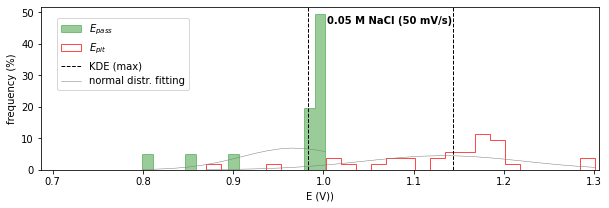

In [41]:
unique_pass=np.unique(pit_pass_log['Epass_x']) # all data points considered
unique_pit=np.unique(pit_pass_log['Epit_x']) 
bins_pass=len(unique_pass)
bins_pit=len(unique_pit)

fig, ax = plt.subplots(figsize=(10,3))

ax.hist(pit_pass_log['Epass_x'][round(pit_pass_log['Epass_x'],2)!=0.5],density=True,bins=bins_pass,color="green",fill=True,histtype='step',alpha=0.4,label="$E_{pass}$")
ax.hist(pit_pass_log['Epit_x'][round(pit_pass_log['Epit_x'],2)!=0.5], density=True,bins=bins_pit,color="red",fill=False,histtype='step',linewidth=0.7,label="$E_{pit}$")

ax.axvline(x = Epass_x_kde,color = 'k',linestyle = 'dashed',linewidth = 1,zorder=2,label="KDE (max)")
ax.axvline(x = Epit_x_kde,color = 'k',linestyle = 'dashed',linewidth = 1,zorder=2)

ax.set_xlabel("E (V))")
ax.set_ylabel("frequency (%)")
ax.set_xlim(0.687,1.305) 
ax.set_title("0.05 M NaCl (50 mV/s)",fontsize = 10, y=0.86,x=0.625,weight='bold') 

# fitting curves
Epass_sort=np.sort(pit_pass_log['Epass_x'][round(pit_pass_log['Epass_x'],2)!=0.5].dropna()) 
xpass=np.linspace(Epass_sort[0],Epass_sort[-1],len(unique_pass)) 
dist = distfit(distr="norm",smooth=20,bins=round(len(unique_pass)/2)) 
dist.fit_transform(Epass_sort, verbose=1)  
print(dist.model['name']+" RSS: "+str(dist.model['score'])) 
model=norm.pdf(xpass, dist.model['params'][0],dist.model['params'][1])
ax.plot(xpass,model,"grey",linewidth=0.5,label="normal distr. fitting")

Epit_sort=np.sort(pit_pass_log['Epit_x'][round(pit_pass_log['Epit_x'],2)!=0.5]) 
xpit=np.linspace(Epit_sort[0],Epit_sort[-1],len(unique_pit)) 
dist = distfit(distr="norm",smooth=20,bins=round(len(unique_pit)/2)) 
dist.fit_transform(Epit_sort, verbose=1)  
print(dist.model['name']+" RSS: "+str(dist.model['score'])) 
model=norm.pdf(xpit, dist.model['params'][0],dist.model['params'][1])
ax.plot(xpit,model,"grey",linewidth=0.5)

fig.legend(loc="upper left", bbox_to_anchor=(0.14, 0.85))

### plotting histograms of Epit_y and Epass_y (log(jpit) and log(jpass) (µA/cm²))

Text(0.57, 0.96, '0.05 M NaCl (50 mV/s)')

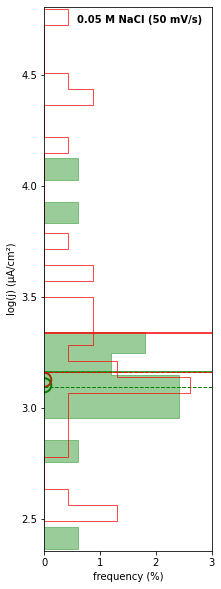

In [42]:
unique_pass=np.unique(pit_pass_log['Epass_y'][round(pit_pass_log['Epass_x'],2)!=0.5])
unique_pit=np.unique(pit_pass_log['Epit_y'][round(pit_pass_log['Epit_x'],2)!=0.5]) 
bins_pass=len(unique_pass)
bins_pit=len(unique_pit)

fig, ax = plt.subplots(figsize=(3,10))

ax.hist(pit_pass_log['Epass_y'][round(pit_pass_log['Epass_x'],2)!=0.5],density=True,bins=bins_pass,color="green",fill=True,histtype='step',alpha=0.4,orientation="horizontal",label="$E_{pass}$")
ax.axhline(y = Epass_y_mean05, color = 'green', linewidth = 1.5,zorder=2,label="mean")
ax.axhline(y = Epass_y_median05, color = 'green',linestyle = 'dashed',linewidth = 1,zorder=2,label="median")

ax.hist(pit_pass_log['Epit_y'][round(pit_pass_log['Epit_x'],2)!=0.5], density=True,bins=bins_pit,color="red",fill=False,histtype='step',linewidth=0.7,orientation="horizontal",label="$E_{pit}$")
ax.axhline(y = Epit_y_mean05, color = 'red', linewidth = 1.5,zorder=2,label="mean")
ax.axhline(y = Epit_y_median05, color = 'red',linestyle = 'dashed',linewidth = 1,zorder=2,label="median")

ax.scatter(0,Epass_y_kde,marker="o",s=200,facecolors='none',edgecolors="g",linewidth=2)
ax.scatter(0,Epit_y_kde,marker="o",s=200,facecolors='none',edgecolors="r",linewidth=2)

ax.set_ylabel("log(j) (µA/cm²)")
ax.set_xlabel("frequency (%)")
ax.set_ylim(min(pit_pass_log['Epass_y'][round(pit_pass_log['Epass_x'],2)!=0.5])-0.01,max(pit_pass_log['Epit_y'])+0.01) 
ax.set_xlim(0,3) 
ax.set_title("0.05 M NaCl (50 mV/s)",fontsize = 10, y=0.96,x=0.57,weight='bold') 

### hypothesis testing
#### null hypothesis 1: the Epass (V) is normally distributed
#### null hypothesis 2: the Epit (V) is normally distributed

Since the p-value is less than 0.05, we reject the null hypothesis. 
We have sufficient evidence to say that the sample data does not come from a normal distribution.

Since the p-value is not less than 0.05, we fail to reject the null hypothesis. 
We do not have sufficient evidence to say that the sample data does not come from a normal distribution.

#### normality tests

In [43]:
from scipy.stats import shapiro, normaltest, anderson

def test_normality(data, hypothesis_num):
    # Shapiro-Wilk Test
    stat, p = shapiro(data)
    print(f"p={p:.3f}")
    if p < 0.05:
        print(f"The null hypothesis {hypothesis_num} can be rejected")
    else:
        print(f"The null hypothesis {hypothesis_num} cannot be rejected: normal distribution")

    # D'Agostino and Pearson's Test
    stat, p = normaltest(data)
    print(f"p={p:.3f}")
    if p < 0.05:
        print(f"The null hypothesis {hypothesis_num} can be rejected")
    else:
        print(f"The null hypothesis {hypothesis_num} cannot be rejected: normal distribution")
    
    # Anderson-Darling Test
    result = anderson(data)
    for i in range(len(result.critical_values)):
        slevel, cvalues = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print(f'{slevel:.3f}: {cvalues:.3f}, data looks normal (fail to reject H0)')
        else:
            print(f'{slevel:.3f}: {cvalues:.3f}, data does not look normal (reject H0)')

# Testing normality for Epass_sort and Epit_sort
print("Epass")
test_normality(Epass_sort, 1)
print("\nEpit")
test_normality(Epit_sort, 2)

Epass
p=0.000
The null hypothesis 1 can be rejected
p=0.000
The null hypothesis 1 can be rejected
15.000: 0.501, data does not look normal (reject H0)
10.000: 0.571, data does not look normal (reject H0)
5.000: 0.685, data does not look normal (reject H0)
2.500: 0.799, data does not look normal (reject H0)
1.000: 0.951, data does not look normal (reject H0)

Epit
p=0.022
The null hypothesis 2 can be rejected
p=0.029
The null hypothesis 2 can be rejected
15.000: 0.523, data does not look normal (reject H0)
10.000: 0.596, data does not look normal (reject H0)
5.000: 0.715, data does not look normal (reject H0)
2.500: 0.834, data does not look normal (reject H0)
1.000: 0.992, data does not look normal (reject H0)


### mean, IQR and selected quantiles for the log(j) distributions 

In [47]:
# mean of log(j)
m=df_log.mean(axis=1) 

quantile_min=np.nanpercentile(df_log, 0.35,axis=1) 
Q1=np.nanpercentile(df_log,25,axis=1)
median=np.nanpercentile(df_log,50,axis=1)
Q3=np.nanpercentile(df_log,75,axis=1)
quantile_max=np.nanpercentile(df_log, 99.65,axis=1) 
IQR=pd.DataFrame({"Qmin":quantile_min,"Q1":Q1,"median":median,"Q3":Q3,"Qmax":quantile_max,"mean":m}) 
IQR

,Qmin,Q1,median,Q3,Qmax,mean
0,1.832511,2.028806,2.133541,2.254426,2.960106,2.162286
1,1.784069,2.028806,2.101357,2.239988,3.684459,2.222924
2,1.841848,2.066595,2.163505,2.266167,3.713693,2.245517
3,1.236542,2.066595,2.163505,2.217862,2.893057,2.137088
4,1.949023,2.083976,2.163505,2.288443,2.884549,2.204987
...,...,...,...,...,...,...
2212,2.797696,4.628147,5.721752,6.082766,6.426111,5.213239
2213,2.796208,4.587952,5.725013,6.083977,6.426687,5.212950
2214,2.799870,4.559810,5.728455,6.085115,6.427246,5.211694
2215,2.810376,4.552567,5.731706,6.086317,6.427826,5.210727


#### smoothing the IQR values of log(j) 

In [52]:
IQR_ylow_log = IQR.copy()

column_names =  IQR.columns
for index, column in enumerate(column_names):
        
    lowess = sm.nonparametric.lowess
    ylow = lowess(IQR[column],E,frac= 0.15,return_sorted=False)
    IQR_ylow_log[column]=ylow
    
IQR_ylow_log

,Qmin,Q1,median,Q3,Qmax,mean
0,1.851389,2.088503,2.160299,2.272920,3.182058,2.216439
1,1.852115,2.089009,2.160879,2.273962,3.183795,2.217360
2,1.852841,2.089514,2.161459,2.275005,3.185533,2.218281
3,1.853566,2.090020,2.162039,2.276047,3.187270,2.219202
4,1.855016,2.091030,2.163198,2.278131,3.190745,2.221044
...,...,...,...,...,...,...
2212,2.566141,4.509064,5.961419,6.091692,6.430695,5.238750
2213,2.566368,4.512595,5.965725,6.092683,6.431243,5.240854
2214,2.566595,4.516126,5.970029,6.093673,6.431790,5.242957
2215,2.566822,4.519658,5.974335,6.094664,6.432338,5.245061


### plotting the KDE of Epit/log(jpit) with selected quantile curves of log(j)

In [53]:
# further smoothing the log(j) curves for improved visualization of the Qmin curve in the KDE plots below 
IQR_ylow01_log = IQR.copy()

column_names =  IQR.columns
for index, column in enumerate(column_names):
        
    lowess = sm.nonparametric.lowess
    ylow = lowess(IQR[column],E,frac= 0.1,return_sorted=False)
    IQR_ylow01_log[column]=ylow

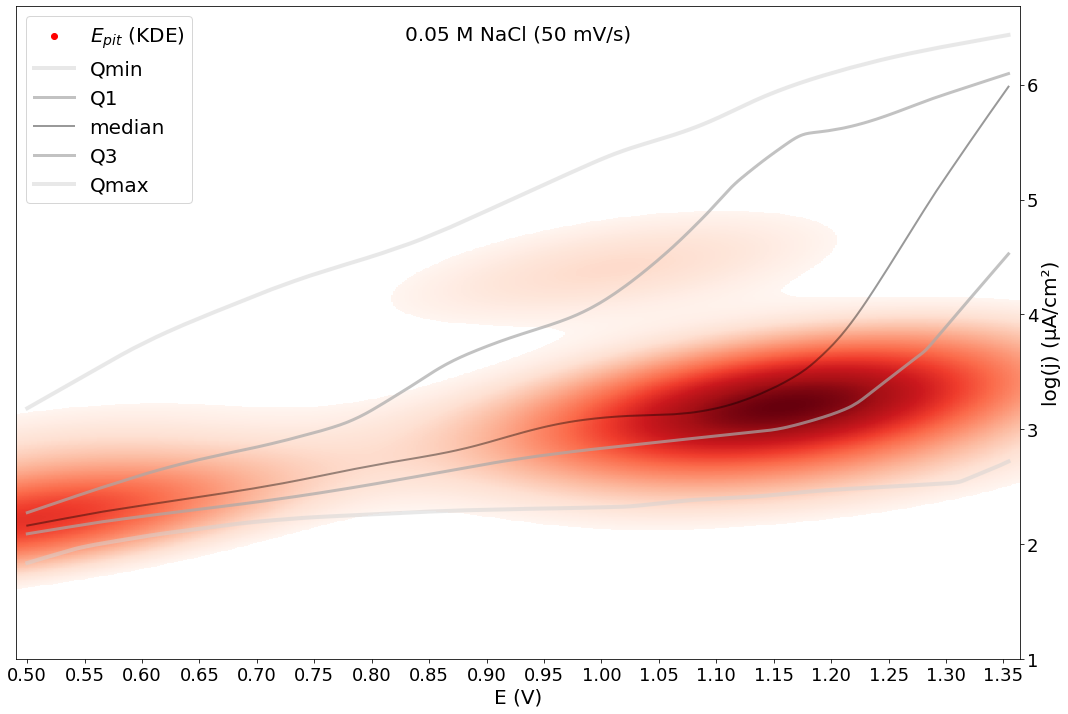

In [54]:
resolution=abs(np.diff(pit_pass_log["Epit_y"])).min()
nbins= round((pit_pass_log["Epit_y"].max()-pit_pass_log["Epit_y"].min())/resolution)

k = kde.gaussian_kde([pit_pass_log["Epit_x"],pit_pass_log["Epit_y"]])
xipit, yipit = np.mgrid[pit_pass_log["Epit_x"].min()-0.08:pit_pass_log["Epit_x"].max()+0.08:nbins*1j, pit_pass_log["Epit_y"].min()-0.8:pit_pass_log["Epit_y"].max()+0.8:nbins*1j]
zipit = k(np.vstack([xipit.flatten(), yipit.flatten()]))
z = np.ma.masked_array(zipit, zipit < 0.15)

fig, ax = plt.subplots(figsize=(18, 12))
plt.pcolormesh(xipit, yipit, z.reshape(xipit.shape), shading='auto',cmap="Reds")

ax.scatter(0,0,color="red",label="$E_{pit}$ (KDE)") # plot for the sake of the legend label

ax.plot(E , IQR_ylow01_log["Qmin"],color="lightgrey",linewidth=4,label="Qmin",alpha=0.5,zorder=1)    
ax.plot(E , IQR_ylow_log["Q1"], color="darkgray",linewidth=3,label="Q1",alpha=0.7,zorder=1) 
ax.plot(E , IQR_ylow_log["median"], color="k",linewidth=2,label="median",alpha=0.4,zorder=1) 
ax.plot(E , IQR_ylow_log["Q3"],color="darkgray",linewidth=3,label="Q3",alpha=0.7,zorder=1) 
ax.plot(E , IQR_ylow_log["Qmax"], color="lightgrey",linewidth=4,label="Qmax",alpha=0.5,zorder=1) 

ax.legend( loc ="upper left",prop={'size': 20})
ax.set_ylabel("log(j) (µA/cm²)")
ax.set_xlabel("E (V)")
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

ax.set_xticks(np.arange(0.5,1.3544115,0.05)) 
ax.set_xlim(0.5-0.01,1.3544115+0.01) 
ax.set_ylim(np.log10(10), np.log10(4800000)) 

ax.set_title("0.05 M NaCl (50 mV/s)",fontsize = 20, y=0.94)

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

### plotting the KDE of Epass/log(jpass) with selected quantile curves of log(j)

Text(0.5, 0.94, '0.05 M NaCl (50 mV/s)')

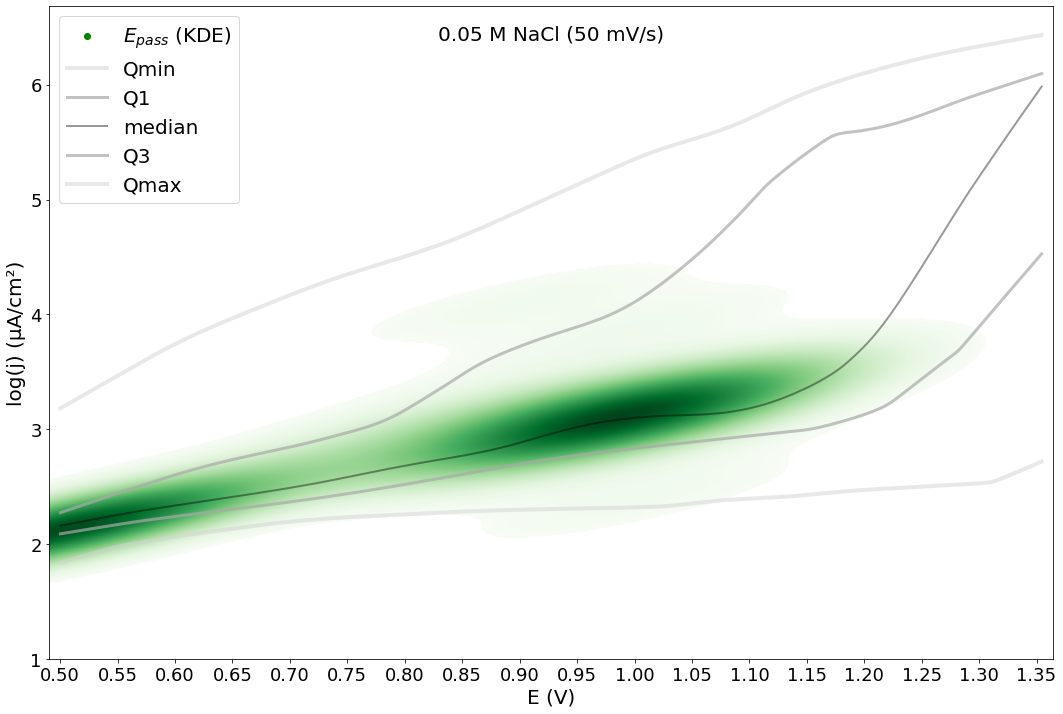

In [55]:
resolutionpass=abs(np.diff(pit_pass_log["Epass_y"].dropna())).min()
nbinspass= round((pit_pass_log["Epass_y"].max()-pit_pass_log["Epass_y"].dropna().min())/resolutionpass)

k = kde.gaussian_kde([pit_pass_log["Epass_x"].dropna(),pit_pass_log["Epass_y"].dropna()])
xipass, yipass = np.mgrid[pit_pass_log["Epass_x"].min()-0.08:pit_pass_log["Epass_x"].max()+0.8:nbinspass*1j, pit_pass_log["Epass_y"].min()-0.8:pit_pass_log["Epass_y"].max()+0.8:nbinspass*1j]
zipass = k(np.vstack([xipass.flatten(), yipass.flatten()]))
z = np.ma.masked_array(zipass, zipass < 0.15)

fig, ax = plt.subplots(figsize=(18, 12))
plt.pcolormesh(xipass, yipass, z.reshape(xipass.shape), shading='auto',cmap="Greens")

ax.scatter(0,0,color="green",label="$E_{pass}$ (KDE)") # plot for the sake of the legend label

ax.plot(E , IQR_ylow01_log["Qmin"],color="lightgrey",linewidth=4,label="Qmin",alpha=0.5,zorder=1)    
ax.plot(E , IQR_ylow_log["Q1"], color="darkgray",linewidth=3,label="Q1",alpha=0.7,zorder=1) 
ax.plot(E , IQR_ylow_log["median"], color="k",linewidth=2,label="median",alpha=0.4,zorder=1) 
ax.plot(E , IQR_ylow_log["Q3"],color="darkgray",linewidth=3,label="Q3",alpha=0.7,zorder=1) 
ax.plot(E , IQR_ylow_log["Qmax"], color="lightgrey",linewidth=4,label="Qmax",alpha=0.5,zorder=1) 

ax.legend( loc ="upper left",prop={'size': 20})
ax.set_ylabel("log(j) (µA/cm²)")
ax.set_xlabel("E (V)")
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

ax.set_xticks(np.arange(0.5,1.3544115,0.05)) 
ax.set_xlim(0.5-0.01,1.3544115+0.01) 
ax.set_ylim(np.log10(10), np.log10(4800000)) 

ax.set_title("0.05 M NaCl (50 mV/s)",fontsize = 20, y=0.94)

## Epit and Epass estimations from the IQR and selected quantiles

### Epit

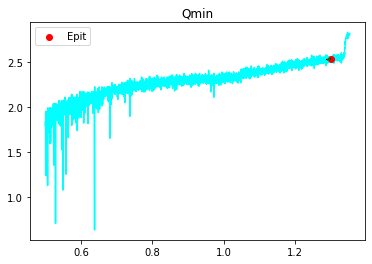

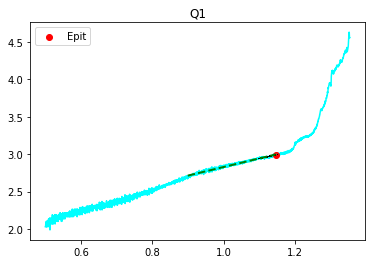

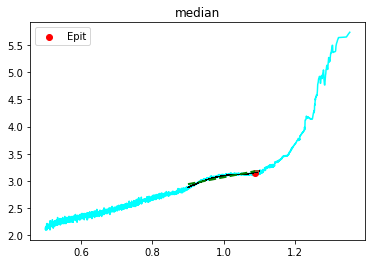

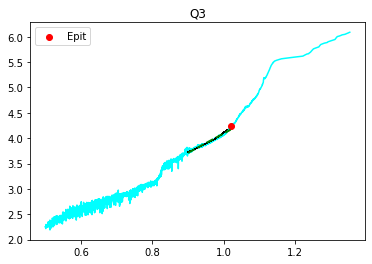

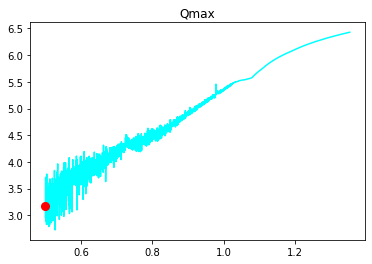

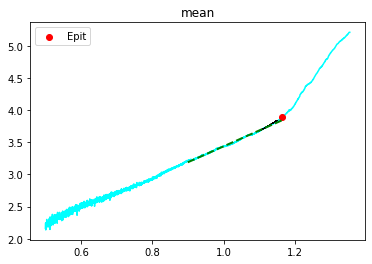

In [67]:
# for avoiding Warnings
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings('ignore')

column_names =  IQR.columns

IQR_pit_E, IQR_pit_j = [],[]

#initialise the two models for part 1 and part 2
model1 = LinearRegression()
model2 = LinearRegression()

for index, column in enumerate(column_names):
    fig, ax = plt.subplots() 
    ax.plot(E , IQR[column], color = "cyan",zorder=1)
    ax.set_title(column)

    #initialise the r2 values
    r2_final1 = 0
    r2_final2 = 0
    
    if column not in ["Qmax"]:
        
        if column == "Qmin":
            limits_pit = range(interval_lower_i32,interval_upper_i32+1,1) 
            Epass_estimated=interval_lower_i32
        elif column == "median":    
            limits_pit = range(interval_lower_i22,interval_lower_i+1,1)     
            Epass_estimated=interval_lower_i22
        elif column == "Q3":    
            limits_pit = range(interval_lower_i12,interval_upper_i12+1,1)  
            Epass_estimated=interval_lower_i12 
        else:
            limits_pit = range(interval_lower_i,interval_upper_i+1,1)  
            Epass_estimated=Epass_estimated_i
        
        for limit in limits_pit:
            
            ax.plot(E.iloc[limits_pit[0]:limits_pit[-1]+1],IQR_ylow_log[column].iloc[limits_pit[0]:limits_pit[-1]+1], color = "black",linewidth=0.5,zorder=2) # ylow
        #split the data into the first part and second part
            dfE_1 =  E.iloc[Epass_estimated:limit+1]
            dfj_1 =  IQR_ylow_log.iloc[Epass_estimated:limit+1]
            if column == "Q3" or "Qmin":
                dfE_2 =  E.iloc[limit:limits_pit[-1]+1]
                dfj_2 =  IQR_ylow_log.iloc[limit:limits_pit[-1]+1]
                pass
            else:
                dfE_2 =  E.iloc[limit:]
                dfj_2 =  IQR_ylow_log.iloc[limit:]
                pass
            
            # split data
            X1,X2 = dfE_1.values.reshape(-1, 1),dfE_2.values.reshape(-1, 1)
            y1,y2 = dfj_1[column].values.reshape(-1, 1),dfj_2[column].values.reshape(-1, 1)

            # fit models and get predictions
            y_pred1 = model1.fit(X1, y1).predict(X1)
            y_pred2 = model2.fit(X2, y2).predict(X2)
            
            # update r2 and models if necessary
            r2_score1, r2_score2 = r2_score(y1, y_pred1), r2_score(y2, y_pred2)
            if r2_score1 > r2_final1:
                r2_final1, regr_final1 = r2_score1, model1
            if r2_score2 > r2_final2:
                r2_final2, regr_final2 = r2_score2, model2
                
        # calculate intersection
        a1,a2 = regr_final1.coef_[0],regr_final2.coef_[0]
        b1,b2 = regr_final1.intercept_,regr_final2.intercept_
        x_intersect = np.around((b1-b2)/(a2-a1),3) 
        E_tempo=E.round(3)
        try:
            xi=E_tempo[E_tempo<=x_intersect.item()].index[-1]
        except:
            xi=E_tempo[E_tempo>=x_intersect.item()].index[0]
            
        # try plotting with intersection            
        try:
            x1_reg,x2_reg=E.iloc[Epass_estimated:xi+1],E.iloc[xi:limits_pit[-1]+1]
            y1_reg, y2_reg = x1_reg*a1 + b1,x2_reg*a2 + b2
            ax.plot(x1_reg, y1_reg, linewidth = 2, color = 'green', linestyle = 'dashed')
            ax.plot(x2_reg, y2_reg, linewidth = 2, color = 'sienna', linestyle = 'dashed')
            ax.scatter(E.iloc[xi],np.mean([IQR[column].iloc[xi],IQR_ylow_log[column].iloc[xi]]),color="red",label="Epit")
            ax.legend() # Epass_j --> the mean between ylow and df_log
            IQR_pit_E.append(E.iloc[xi])
            IQR_pit_j.append(np.mean([IQR[column].iloc[xi],IQR_ylow_log[column].iloc[xi]])) # mean ylow log
        except ValueError:
            print(column)

    else: #Qmax
        ax.scatter(E.iloc[0],IQR_ylow_log[column].iloc[0], marker='.',s=200, c='r',linewidths=2,zorder=3)          
        IQR_pit_E.append(E.iloc[0])
        IQR_pit_j.append(IQR_ylow_log[column].iloc[0])

### Epass 

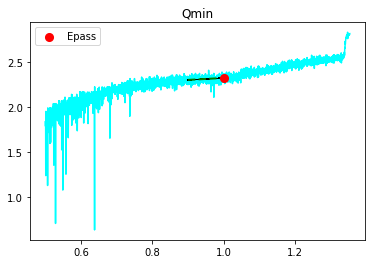

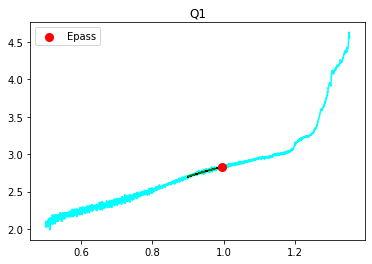

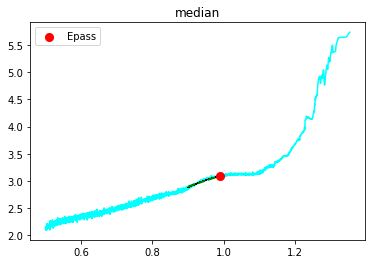

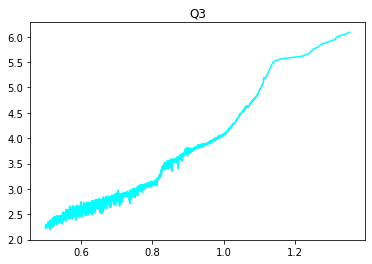

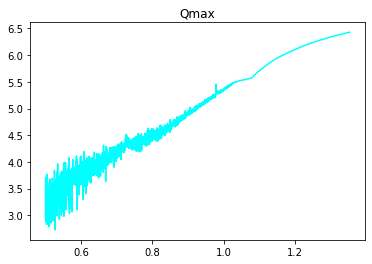

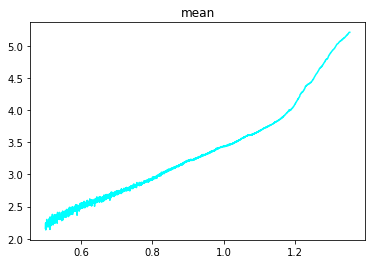

In [70]:
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings('ignore')

column_names = IQR.columns
IQR_pass_E, IQR_pass_j = [], []

model1 = LinearRegression()
model2 = LinearRegression()

for (index, column) in enumerate(column_names):
    fig, ax = plt.subplots()
    ax.plot(E, IQR[column], color="cyan", zorder=1)
    ax.set_title(column)

    if column not in ["Qmax", "mean", "Q3"]:
        limits_pass = range(interval_lower_ipass, interval_upper_ipass+1, 1)
        r2_final1, r2_final2 = 0, 0

        for limit in limits_pass:
            ax.plot(E.iloc[limits_pass[0]:limits_pass[-1]+1], IQR_ylow_log[column].iloc[limits_pass[0]:limits_pass[-1]+1], color="black", linewidth=0.5, zorder=2)

            # split data
            X1 = E.iloc[limits_pass[0]:limit+1].values.reshape(-1, 1)
            X2 = E.iloc[limit:limits_pass[-1]+1].values.reshape(-1, 1)
            y1 = IQR_ylow_log[column].iloc[limits_pass[0]:limit+1].values.reshape(-1, 1)
            y2 = IQR_ylow_log[column].iloc[limit:limits_pass[-1]+1].values.reshape(-1, 1)

            # fit models and get predictions
            y_pred1 = model1.fit(X1, y1).predict(X1)
            y_pred2 = model2.fit(X2, y2).predict(X2)

            # update r2 and models if necessary
            r2_score1, r2_score2 = r2_score(y1, y_pred1), r2_score(y2, y_pred2)
            if r2_score1 > r2_final1:
                r2_final1, regr_final1 = r2_score1, model1
            if r2_score2 > r2_final2:
                r2_final2, regr_final2 = r2_score2, model2

        # calculate intersection
        a1, a2 = regr_final1.coef_[0], regr_final2.coef_[0]
        b1, b2 = regr_final1.intercept_, regr_final2.intercept_
        x_intersect = np.around((b1 - b2) / (a2 - a1), 3)
        E_tempo = E.round(3)
        try:
            xi = E_tempo[E_tempo <= x_intersect.item()].index[-1]
        except IndexError:
            xi = E_tempo[E_tempo >= x_intersect.item()].index[0]

        # try plotting with intersection
        try:
            x1_reg, x2_reg = E.iloc[limits_pass[0]:xi+1], E.iloc[xi:limits_pass[-1]+1]
            y1_reg, y2_reg = x1_reg*a1 + b1, x2_reg*a2 + b2
            ax.plot(x1_reg, y1_reg, linewidth=2, color='green', linestyle='dashed')
            ax.plot(x2_reg, y2_reg, linewidth=2, color='sienna', linestyle='dashed')
            ax.scatter(E.iloc[xi], IQR_ylow_log[column].iloc[xi], marker='.', s=200, c='r', linewidths=2, zorder=3,label="Epass")
            ax.legend() 
            IQR_pass_E.append(E.iloc[xi])
            IQR_pass_j.append(IQR_ylow_log[column].iloc[xi])
        except ValueError:
            print(column)

    else:
        IQR_pass_E.append(np.nan)
        IQR_pass_j.append(np.nan)

#### storing the Epit (x,y) and Epass (x,y) values of the IQR curves in a df 

In [58]:
pit_pass_IQR = pd.DataFrame({"Epit_x":IQR_pit_E,"Epit_y":IQR_pit_j,"Epass_x":IQR_pass_E,"Epass_y":IQR_pass_j})
pit_pass_IQR.index=IQR.columns
pit_pass_IQR.index.name="IQR"
pit_pass_IQR

,Epit_x,Epit_y,Epass_x,Epass_y
IQR,,,,
Qmin,1.300394,2.531604,1.002228,2.320713
Q1,1.146275,2.990893,0.996429,2.829025
median,1.089206,3.149832,0.990326,3.088120
Q3,1.020234,4.235649,NaN,NaN
Qmax,0.500198,3.182058,NaN,NaN
mean,1.163366,3.890496,NaN,NaN


## central tendency estimates of Epass/log(jpass) and Epit/log(jpit)
### comparison of estimates from the maximum KDE (ground truth) with the median and mean proxy models

In [59]:
#median absolute deviation 
from scipy.stats import median_abs_deviation

df_mad=median_abs_deviation(df_log,axis=1)

Text(0.5, 1.0, '0.05 M NaCl (50 mV/s)')

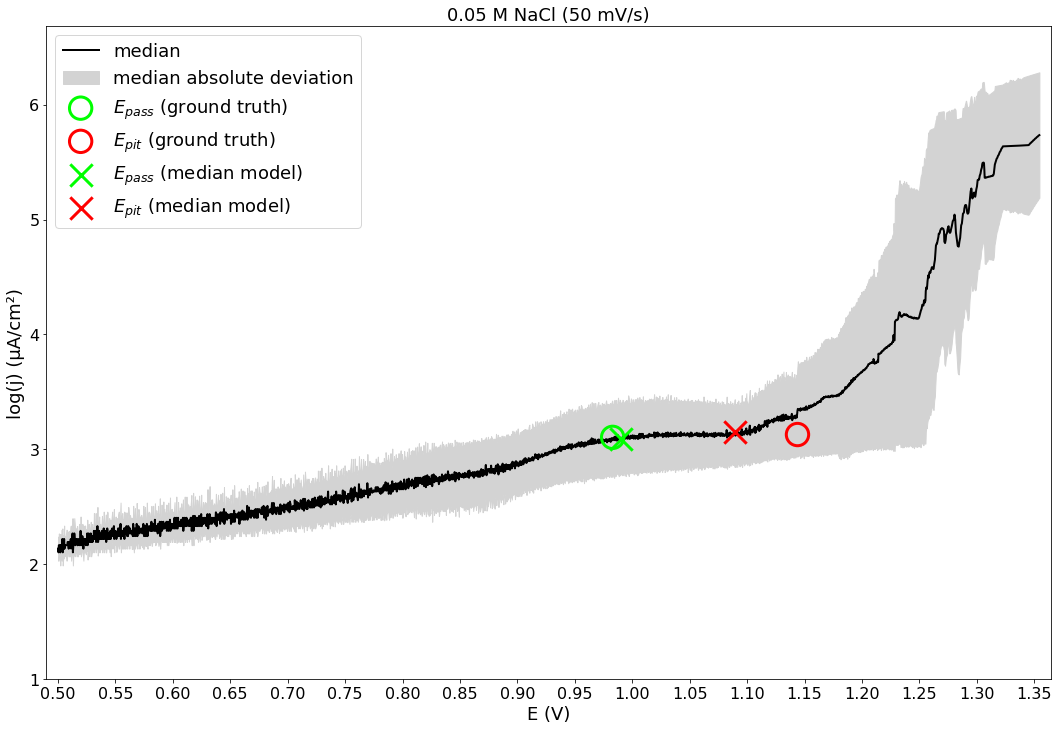

In [60]:
fig, ax = plt.subplots(figsize=(18, 12))

ax.plot(E,IQR["median"], color="k",linewidth=2,label="median")
ax.fill_between(E, IQR["median"]-df_mad, IQR["median"]+df_mad,color="lightgrey",label="median absolute deviation")

ax.scatter(Epass_x_kde,Epass_y_kde,marker="o",facecolors='none',edgecolors="lime",s=500,label="$E_{pass}$ (ground truth)",linewidths=3,zorder=2)
ax.scatter(Epit_x_kde,Epit_y_kde,marker="o",facecolors='none',edgecolors="r",s=500,label="$E_{pit}$ (ground truth)",linewidths=3,zorder=2)

ax.scatter(pit_pass_IQR.loc["median"]["Epass_x"],pit_pass_IQR.loc["median"]["Epass_y"],marker="x",c="lime",s=500,label="$E_{pass}$ (median model)",linewidths=3,zorder=2)
ax.scatter(pit_pass_IQR.loc["median"]["Epit_x"],pit_pass_IQR.loc["median"]["Epit_y"],marker="x",c="red",s=500,label="$E_{pit}$ (median model)",linewidths=3,zorder=2)

ax.legend( loc ="upper left",prop={'size': 18})
ax.set_ylabel("log(j) (µA/cm²)")
ax.set_xlabel("E (V)")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

ax.set_xticks(np.arange(0.5,1.3544115,0.05)) 
ax.set_xlim(0.5-0.01,1.3544115+0.01) 
ax.set_ylim(np.log10(10), np.log10(4800000)) 

ax.set_title("0.05 M NaCl (50 mV/s)",fontsize = 18)

In [61]:
#standard deviation 
df_std=np.std(df_log,axis=1)
    
#standard error of the mean 
from scipy.stats import sem
df_sem=sem(df_log,axis=1) 

Text(0.5, 1.0, '0.05 M NaCl (50 mV/s)')

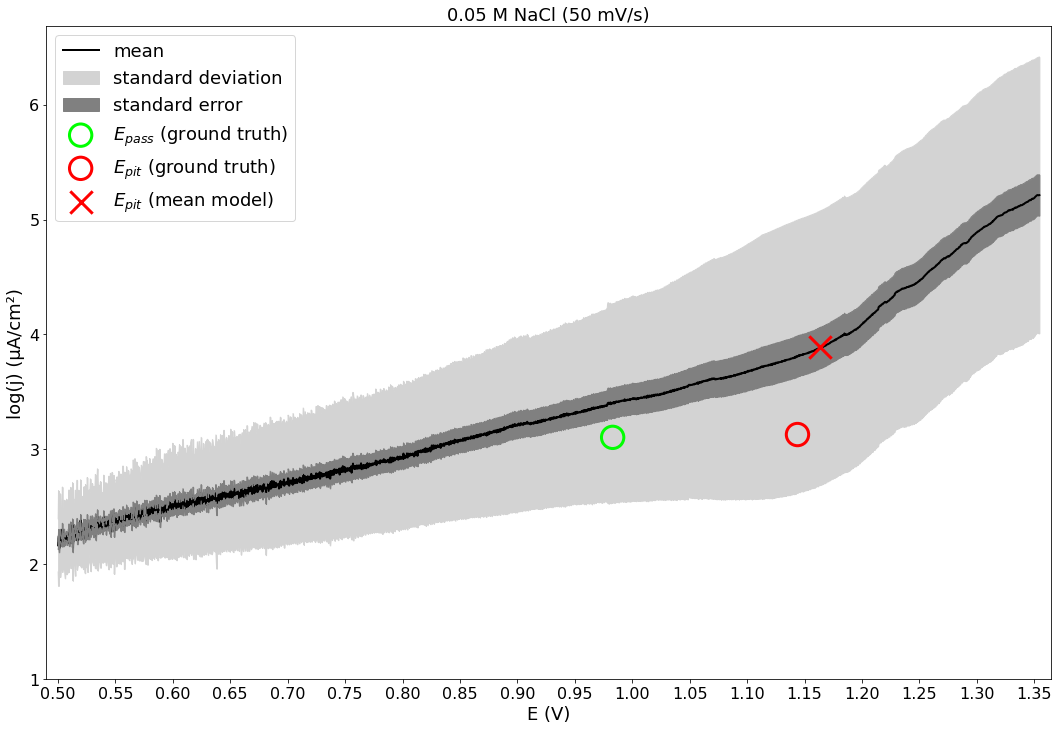

In [62]:
fig, ax = plt.subplots(figsize=(18, 12))
ax.plot(E,m, color="k",linewidth=2,label="mean")

ax.plot(E,m+df_std, color="lightgrey",linewidth=1)
ax.plot(E,m-df_std, color="lightgrey",linewidth=1)
ax.fill_between(E,  m-df_std, m+df_std,color="lightgrey",label="standard deviation")

ax.plot(E,m+df_sem, color="grey",linewidth=1)
ax.plot(E,m-df_sem, color="grey",linewidth=1)
ax.fill_between(E, m-df_sem, m+df_sem,color="grey",label="standard error")

ax.scatter(Epass_x_kde,Epass_y_kde,marker="o",facecolors='none',edgecolors="lime",s=500,label="$E_{pass}$ (ground truth)",linewidths=3,zorder=2)
ax.scatter(Epit_x_kde,Epit_y_kde,marker="o",facecolors='none',edgecolors="r",s=500,label="$E_{pit}$ (ground truth)",linewidths=3,zorder=2)

ax.scatter(pit_pass_IQR.loc["mean"]["Epass_x"],pit_pass_IQR.loc["mean"]["Epass_y"],marker="x",c="lime",s=500,linewidths=3,zorder=2)
ax.scatter(pit_pass_IQR.loc["mean"]["Epit_x"],pit_pass_IQR.loc["mean"]["Epit_y"],marker="x",c="red",s=500,label="$E_{pit}$ (mean model)",linewidths=3,zorder=2)

ax.legend( loc ="upper left",prop={'size': 18})
ax.set_ylabel("log(j) (µA/cm²)")
ax.set_xlabel("E (V)")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

ax.set_xticks(np.arange(0.5,1.3544115,0.05)) 
ax.set_xlim(0.5-0.01,1.3544115+0.01) 
ax.set_ylim(np.log10(10), np.log10(4800000)) 

ax.set_title("0.05 M NaCl (50 mV/s)",fontsize = 18)

### storing the ground truth values of Epass/log(jpass) and Epit/log(jpit) and the mean-/median-based estimates in a df (and exporting it as a CSV file)

In [63]:
residuals_mean_median = pd.DataFrame(
[[Epass_x_kde,
Epass_y_kde,
Epit_x_kde,
Epit_y_kde,
pit_pass_IQR.loc["median"]["Epass_x"],
pit_pass_IQR.loc["median"]["Epass_y"],
pit_pass_IQR.loc["median"]["Epit_x"],
pit_pass_IQR.loc["median"]["Epit_y"],
pit_pass_IQR.loc["mean"]["Epass_x"],
pit_pass_IQR.loc["mean"]["Epass_y"],
pit_pass_IQR.loc["mean"]["Epit_x"],
pit_pass_IQR.loc["mean"]["Epit_y"],
Epass_x_kde-pit_pass_IQR.loc["median"]["Epass_x"], # computing residuals of estimation
Epass_y_kde-pit_pass_IQR.loc["median"]["Epass_y"],
Epit_x_kde-pit_pass_IQR.loc["median"]["Epit_x"],
Epit_y_kde-pit_pass_IQR.loc["median"]["Epit_y"],
Epass_x_kde-pit_pass_IQR.loc["mean"]["Epass_x"],
Epass_y_kde-pit_pass_IQR.loc["mean"]["Epass_y"],
Epit_x_kde-pit_pass_IQR.loc["mean"]["Epit_x"],
Epit_y_kde-pit_pass_IQR.loc["mean"]["Epit_y"]]], 
columns=["Epass","jpass","Epit","jpit",
        'median Epass','median jpass','median Epit','median jpit','mean Epass','mean jpass','mean Epit','mean jpit',
        'median Epass res','median jpass res','median Epit res','median jpit res','mean Epass res','mean jpass res','mean Epit res','mean jpit res'],
index=[4])
# choosing the directory for stotring the dataset
os.chdir(r"C:\Users\lbertolu\OneDrive - Vrije Universiteit Brussel\ULB\SECCM tests\pitting statistics paper draft\pape2")
residuals_mean_median.to_csv('residuals_mean_median_005_50.csv', index=True)
residuals_mean_median

,Epass,jpass,Epit,jpit,median Epass,median jpass,median Epit,median jpit,mean Epass,mean jpass,mean Epit,mean jpit,median Epass res,median jpass res,median Epit res,median jpit res,mean Epass res,mean jpass res,mean Epit res,mean jpit res
4,0.982919,3.102831,1.143834,3.127362,0.990326,3.08812,1.089206,3.149832,NaN,NaN,1.163366,3.890496,-0.007407,0.014711,0.054628,-0.02247,NaN,NaN,-0.019532,-0.763134
